## PROBLEM STATEMENT

This Project aims is to build an intelligent, automated system that accurately predicts the risk of a loan applicant defaulting. By moving beyond traditional methods, we aim to create a powerful tool that not only enhances decision-making but also provides a clear, understandable picture of credit risk.

In today's competitive financial landscape, making lending decisions that are both fast and safe is paramount. Traditional credit assessment can be slow, subjective, and may fail to uncover complex patterns hidden in applicant data. This can lead to missed opportunities with good applicants or, conversely, financial losses from high-risk loans. This project directly addresses these challenges by leveraging artificial intelligence to create a more reliable and efficient process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#url_perf= 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/main/trainperf.csv'

In [3]:
#url_perf

In [4]:
df_perf = pd.read_csv('C:/Users/USER/Downloads/trainperf.csv')

In [5]:
#df_perf = pd.read_csv(url_perf)

In [6]:
df_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [7]:
df_perf.shape

(4368, 10)

In [8]:
df_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [9]:
df_perf.isna().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64

In [10]:
(df_perf.isna().sum().sort_values(ascending=False)/len(df_perf) * 100)

referredby       86.561355
customerid        0.000000
systemloanid      0.000000
loannumber        0.000000
approveddate      0.000000
creationdate      0.000000
loanamount        0.000000
totaldue          0.000000
termdays          0.000000
good_bad_flag     0.000000
dtype: float64

* the above is a check for missing value percentages per column. The 'referredby' column is mostly empty (86.6% missing), while all other critical columns are all intact.

In [11]:
df_perf.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
systemloanid,4368.0,3.019810e+08,13431.15,301958485.0,301969128.0,301980100.0,301993503.5,302004050.0
loannumber,4368.0,5.170000e+00,3.65,2.0,2.0,4.0,7.0,27.0
loanamount,4368.0,1.780907e+04,10749.69,10000.0,10000.0,10000.0,20000.0,60000.0
totaldue,4368.0,2.125738e+04,11943.51,10000.0,13000.0,13000.0,24500.0,68100.0
termdays,4368.0,2.926000e+01,11.51,15.0,30.0,30.0,30.0,90.0


In [12]:
df_perf.duplicated().sum()

0

In [13]:
df_perf.tail()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad
4367,8a858fd458639fcc015868eb14b542ad,301967124,8,2017-07-06 21:01:06.000000,2017-07-06 20:01:01.000000,30000.0,34500.0,30,NaN,Bad


In [14]:
#Converting the 'approveddate' and 'creationdate' columns from object datatype into proper datetime 
from datetime import datetime
df_perf['approveddate']=pd.to_datetime(df_perf['approveddate'],errors='coerce')
df_perf['creationdate'] = pd.to_datetime(df_perf['creationdate'], errors='coerce')

In [15]:
df_perf['approveddate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4368 entries, 0 to 4367
Series name: approveddate
Non-Null Count  Dtype         
--------------  -----         
4368 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.3 KB


In [16]:
df_perf['creationdate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4368 entries, 0 to 4367
Series name: creationdate
Non-Null Count  Dtype         
--------------  -----         
4368 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.3 KB


* NEW COLUMN CREATION
  
Lets create a new column that will extract the day of the week (e.g., 'Monday', 'Friday') from the 'approveddate' column.
This feature helps analyze if loan approval volumes or default rates have any weekly patterns, as certain days might exhibit different customer behavior or operational characteristics.

In [17]:
#. Approval Weekday
df_perf['approval_weekday'] = df_perf['approveddate'].dt.day_name()

In [18]:
df_perf['approval_weekday'].unique

<bound method Series.unique of 0         Tuesday
1       Wednesday
2        Thursday
3        Thursday
4          Monday
          ...    
4363       Sunday
4364     Thursday
4365      Tuesday
4366       Friday
4367     Thursday
Name: approval_weekday, Length: 4368, dtype: object>

In [19]:
df_perf['approval_weekday'].value_counts()

approval_weekday
Wednesday    714
Monday       703
Thursday     692
Friday       688
Tuesday      661
Saturday     525
Sunday       385
Name: count, dtype: int64

In [20]:
#url_demo= 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/main/traindemographics.csv'

In [21]:
#df_demo = pd.read_csv(url_demo)

In [22]:
df_demo = pd.read_csv('C:/Users/USER/Downloads/traindemographics.csv')

In [23]:
df_demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [24]:
df_demo.shape

(4346, 9)

In [25]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


*Observations

(1)we have missing values in 3 columns. 

(2) datatype of the birthdate is an object,which is not suppose to be.

(3) we can see that the bank_branch_clients column has a large concentration of missing values with about 98.83% which means that it lacks statistical power and could introduce noise to the model.

In [26]:
df_demo.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude_gps,4346.0,4.626189,7.184832,-118.247009,3.354953,3.593302,6.545220,151.209290
latitude_gps,4346.0,7.251356,3.055052,-33.868818,6.470610,6.621888,7.425052,71.228069


In [27]:
(df_demo.isna().sum().sort_values(ascending=False)/len(df_demo)) * 100

bank_branch_clients           98.826507
level_of_education_clients    86.493327
employment_status_clients     14.910262
customerid                     0.000000
birthdate                      0.000000
bank_account_type              0.000000
longitude_gps                  0.000000
latitude_gps                   0.000000
bank_name_clients              0.000000
dtype: float64

In [28]:
df_demo.tail()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary
4345,8a85896653e2e18b0153e69c1b90265c,1975-06-05 00:00:00.000000,Savings,6.661014,7.472700,UBA,NaN,Permanent,NaN


In [29]:
df_demo.duplicated().sum()

12

In [30]:
duplicates = df_demo[df_demo.duplicated(keep=False)]

In [31]:
duplicates

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
138,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,NaN,Permanent,NaN
159,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,NaN,Permanent,NaN
272,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
445,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,NaN,Permanent,NaN
517,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
750,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,NaN,Permanent,NaN
776,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,NaN,Permanent,NaN
798,8a858fc75cd62882015cdaf2f4311b3f,1975-10-27 00:00:00.000000,Savings,7.437607,9.088935,GT Bank,NaN,Permanent,NaN
1010,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,NaN,Permanent,NaN
1015,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,NaN,Permanent,NaN


This check above reveals the presence of duplicated rows.
* Insight

The core issue here is that the same customer (identified by customerid) appears on multiple rows with identical information. For example, the customers at index 138 and 159 are the same person. This suggests the data is not a unique list of customers but rather a log where customer details were recorded for each transaction or event.
Implication: Keeping these duplicates would skew the analysis and create for redundancy. 
The best approach to take to resolve this is to drop all the duplicated rows, creating a clean record for each unique customer.

In [32]:
#lets drop all duplicates
df_demo.drop_duplicates(keep ='first', inplace =True)

In [33]:
df_demo.duplicated().sum()

0

Since customerid is the column with the unique identifier for all the customers,Each customer must be uniquely represented to avoid data leakage.
Also,Duplicates can inflate sample size and distort model learning.

In [34]:
#Converting birthdate from object to datetime
from datetime import datetime
df_demo['birthdate'] = pd.to_datetime(df_demo['birthdate'], errors='coerce')

In [35]:
df_demo['birthdate'].info()

<class 'pandas.core.series.Series'>
Index: 4334 entries, 0 to 4345
Series name: birthdate
Non-Null Count  Dtype         
--------------  -----         
4334 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 67.7 KB


In [36]:
# calculate age
df_demo['age'] = datetime.now().year - df_demo['birthdate'].dt.year

* Feature Engineering: Creation of  a new column.-AGE

This calculates the approximate age of each customer by subtracting their birth year from the current year.
This transforms the birthdate into a more direct and powerful numerical feature for modeling.

In [37]:
# filter only those between 18 and 65
df_demo = df_demo[ (df_demo['age'] >= 18) & (df_demo['age'] <= 65)]

Lets filter the dataset by creating an age bracket for those who can access this loan(because it is not open to all).
It is only open or accesible to those who are within the correct legal age bracket for loan access.
According to Law and banking regulations,the minimum age limit for loan eligibility is 18 years and the maximum is 65 years,because most banks and fintech lenders prefer borrowers who are economically active,and fall with this age.

if you observe now,you can see that the birthdate column datatype is no longer an object,but datetime,and why we needed to convert it is because Datetime format validation ensures all entries follow a proper date structure, catching invalid or inconsistent entries.

In [38]:
df_demo['age'] = df_demo['age'].astype('int64')

In [39]:
#lets deal with the msising values in the level_of_education_clients by checking which level occurs more frequently first
df_demo['level_of_education_clients'].value_counts()

level_of_education_clients
Graduate         420
Secondary         88
Post-Graduate     68
Primary           10
Name: count, dtype: int64

Fillinit with the mode tends to introduce more bias toward the most common category and it may affect model performance,since education level of the client is an considered an important factor. So lets fill it with Unknown in order to preserve the column as regards its importance in our prediction task

In [40]:
df_demo['level_of_education_clients'].fillna('Unknown',inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_19792\2882732068.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_demo['level_of_education_clients'].fillna('Unknown',inplace=True)


In [41]:
#the above is not an error but a warning,but to further avoid such,we use ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [42]:
df_demo.employment_status_clients.value_counts()

employment_status_clients
Permanent        3134
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: count, dtype: int64

In [43]:
#df_demo.employment_status_clients.unique()

<Axes: xlabel='employment_status_clients'>

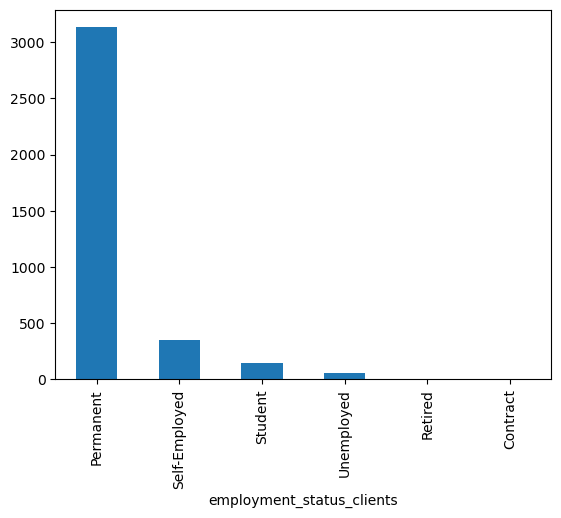

In [44]:
df_demo.employment_status_clients.value_counts().plot(kind='bar')

In [45]:
#Let group into rare categories for the employment_status_clients so we can reduce noise and allow for the model to learn general trends
#it also helps to balance the data by preventing the dorminant class from overpowering the others

The data is heavily skewed towards "Permanent" and "Self-Employed" individuals, who together represent the vast majority of the dataset. Grouping them simplifies the data significantly without losing much information about the overall distribution.

Categories like "Unemployed," "Retired," and "Contract" have very few entries. By grouping these into a single "Inactive" category, you create a more statistically stable group.

In [46]:
def collapse_and_fill(status):
    #Turn NaN into a clear “Missing” label
    if pd.isnull(status):
        return 'Missing'
    
    #Group active workers
    if status in ['Permanent', 'Self-Employed']:
        return 'Employed'
    
    #Group inactive/short-term workers
    if status in ['Unemployed', 'Retired', 'Contract']:
        return 'Inactive'
    
    #Keep students separate
    if status == 'Student':
        return 'Student'
    
    #Catch any unforeseen categories
    return 'Other'


In [47]:
df_demo['employment_status_clients'] = df_demo['employment_status_clients'].apply(collapse_and_fill)

In [48]:
df_demo['employment_status_clients'].value_counts()

employment_status_clients
Employed    3482
Missing      648
Student      142
Inactive      62
Name: count, dtype: int64

In [49]:
df_demo['employment_status_clients'] = df_demo['employment_status_clients'].replace(['Missing'], 'Unknown')

In [50]:
df_demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,Unknown,Unknown,52
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Employed,Unknown,39
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,Unknown,Unknown,38
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Employed,Unknown,34
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Employed,Unknown,43


In [51]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4334 entries, 0 to 4345
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4334 non-null   object        
 1   birthdate                   4334 non-null   datetime64[ns]
 2   bank_account_type           4334 non-null   object        
 3   longitude_gps               4334 non-null   float64       
 4   latitude_gps                4334 non-null   float64       
 5   bank_name_clients           4334 non-null   object        
 6   bank_branch_clients         51 non-null     object        
 7   employment_status_clients   4334 non-null   object        
 8   level_of_education_clients  4334 non-null   object        
 9   age                         4334 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 372.5+ KB


In [52]:
df_demo.latitude_gps.unique

<bound method Series.unique of 0        6.528604
1        7.119403
2        5.563174
3        6.642485
4       11.971410
          ...    
4341     7.030168
4342     4.875662
4343     7.092508
4344     6.539070
4345     7.472700
Name: latitude_gps, Length: 4334, dtype: float64>

In [53]:
df_demo.longitude_gps.unique

<bound method Series.unique of 0       3.319219
1       3.325598
2       5.746100
3       3.362850
4       8.455332
          ...   
4341    3.236753
4342    7.013750
4343    6.295530
4344    3.354206
4345    6.661014
Name: longitude_gps, Length: 4334, dtype: float64>

* Creation of a New Column-- ZONE

Mapping individual states into broader zones delivers significant advantages over using a raw “City, State” feature.

In [54]:
#Defining Nigeria's bounding box and selecting rows inside it
lon_min, lon_max = 2.5, 15.0
lat_min, lat_max = 4.0, 14.0

In [55]:
import reverse_geocode as rg

mask = (
    df_demo['longitude_gps'].between(lon_min, lon_max) &
    df_demo['latitude_gps'].between(lat_min, lat_max)
)

#List preparation of (lat, lon) tuples for masked rows
coords = list(zip(
    df_demo.loc[mask, 'latitude_gps'],
    df_demo.loc[mask, 'longitude_gps']
))

#Reverse‐geocode: returns a list of dicts with keys 'name' (city), 'admin1' (state)
locations = rg.search(coords)

In [56]:
# results is list of dicts like {'name': 'Lagos', 'admin1': 'Lagos', 'cc': 'NG', 'lat': '6.45', 'lon': '3.39'}
#convert to dataframe
loc_df = pd.DataFrame(locations)
#concatenate
df_demo = pd.concat([df_demo.reset_index(drop=True), loc_df.reset_index(drop=True)], axis=1)

# Example new columns: name (nearest town/city), admin1 (state)
df_demo.rename(columns={'name': 'nearest_city', 'admin1': 'state'}, inplace=True)

In [57]:
#Mapping of Nigerian states to zones
state_to_zone = {
    'Abia': 'South East',      'Anambra': 'South East',
    'Imo': 'South East',       'Enugu': 'South East',
    'Ebonyi': 'South East',
    
    'Lagos': 'South West',     'Ogun': 'South West',
    'Oyo': 'South West',       'Ondo': 'South West',
    'Osun': 'South West',      'Ekiti': 'South West',
    
    'Kaduna': 'North West',    'Kano': 'North West',
    'Sokoto': 'North West',    'Katsina': 'North West',
    'Zamfara': 'North West',   'Jigawa': 'North West',
    'Kebbi': 'North West',
    
    'Borno': 'North East',     'Yobe': 'North East',
    'Adamawa': 'North East',   'Gombe': 'North East',
    'Taraba': 'North East',    'Bauchi': 'North East',
    
    'Rivers': 'South South',   'Delta': 'South South',
    'Edo': 'South South',      'Bayelsa': 'South South',
    'Akwa Ibom': 'South South','Cross River': 'South South',
    
    'Niger': 'North Central','Benue': 'North Central',
    'Plateau': 'North Central','Kogi': 'North Central',
    'Kwara': 'North Central','Nasarawa': 'North Central',
    'FCT': 'North Central'
}

# 4. Map state → zone, defaulting to “Unknown Zone”
df_demo['zone'] = df_demo['state'].map(state_to_zone).fillna('Unknown Zone')


In [58]:
print("\nZone distribution:")
print(df_demo['zone'].value_counts())


Zone distribution:
zone
South West       1975
Unknown Zone     1818
North Central     353
South South       119
South East         43
North East         17
North West          9
Name: count, dtype: int64


In [59]:
df_demo.customerid.unique()

array(['8a858e135cb22031015cbafc76964ebd',
       '8a858e275c7ea5ec015c82482d7c3996',
       '8a858e5b5bd99460015bdc95cd485634', ...,
       '8a858f4f5b66de3a015b66fc83c61902',
       '8aaae7a74400b28201441c8b62514150',
       '8a85896653e2e18b0153e69c1b90265c'], dtype=object)

In [60]:
#url_previous='https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/main/trainprevloans.csv'

In [61]:
#df_prev=pd.read_csv(url_previous)

In [62]:
df_prev = pd.read_csv('C:/Users/USER/Downloads/trainprevloans.csv')

In [63]:
df_prev.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [64]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [65]:
df_prev.tail()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000
18182,8a858faf5679a838015688de3028143d,301715255,2,2016-09-14 23:42:14.000000,2016-09-14 22:42:05.000000,10000.0,13000.0,30,2016-09-29 19:51:04.000000,NaN,2016-10-14 00:00:00.000000,2016-09-29 19:35:55.000000


In [66]:
df_prev['customerid'].nunique()

4359

In [67]:
df_prev['systemloanid'].nunique()

18183

In [68]:
df_prev['creationdate'] = pd.to_datetime(df_prev['creationdate'], errors='coerce')
df_prev['approveddate'] = pd.to_datetime(df_prev['approveddate'], errors='coerce')
df_prev['firstduedate'] = pd.to_datetime(df_prev['firstduedate'], errors='coerce')
df_prev['firstrepaiddate'] = pd.to_datetime(df_prev['firstrepaiddate'], errors='coerce')
df_prev['closeddate'] = pd.to_datetime(df_prev['closeddate'], errors='coerce')

In [69]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       18183 non-null  object        
 1   systemloanid     18183 non-null  int64         
 2   loannumber       18183 non-null  int64         
 3   approveddate     18183 non-null  datetime64[ns]
 4   creationdate     18183 non-null  datetime64[ns]
 5   loanamount       18183 non-null  float64       
 6   totaldue         18183 non-null  float64       
 7   termdays         18183 non-null  int64         
 8   closeddate       18183 non-null  datetime64[ns]
 9   referredby       1026 non-null   object        
 10  firstduedate     18183 non-null  datetime64[ns]
 11  firstrepaiddate  18183 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [70]:
df_prev.isna().sum()

customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64

In [71]:
df_prev.isna().sum()/(len(df_prev)) * 100

customerid          0.000000
systemloanid        0.000000
loannumber          0.000000
approveddate        0.000000
creationdate        0.000000
loanamount          0.000000
totaldue            0.000000
termdays            0.000000
closeddate          0.000000
referredby         94.357367
firstduedate        0.000000
firstrepaiddate     0.000000
dtype: float64

In [72]:
df_prev.describe().T

,count,mean,min,25%,50%,75%,max,std
systemloanid,18183.0,301839474.005885,301600134.0,301776577.0,301854965.0,301919682.5,302000275.0,93677.672704
loannumber,18183.0,4.189353,1.0,2.0,3.0,6.0,26.0,3.24949
approveddate,18183,2017-02-25 09:59:36.147390464,2016-01-15 08:53:28,2016-12-19 16:13:04.500000,2017-04-04 16:44:44,2017-05-27 15:07:16,2017-07-28 10:47:43,NaN
creationdate,18183,2017-02-25 08:55:29.725677824,2016-01-15 07:53:17,2016-12-19 15:12:53.500000,2017-04-04 15:44:31,2017-05-27 14:07:06.500000,2017-07-28 09:46:34,NaN
loanamount,18183.0,16501.23742,3000.0,10000.0,10000.0,20000.0,60000.0,9320.547516
totaldue,18183.0,19573.202931,3450.0,11500.0,13000.0,24500.0,68100.0,10454.245277
termdays,18183.0,26.69279,15.0,15.0,30.0,30.0,90.0,10.946556
closeddate,18183,2017-03-21 06:55:48.228895232,2016-02-02 08:18:15,2017-01-16 20:53:36,2017-04-27 17:18:59,2017-06-21 19:12:49,2017-07-30 22:09:11,NaN
firstduedate,18183,2017-03-22 09:52:03.642963456,2016-02-15 00:00:00,2017-01-16 00:00:00,2017-05-02 00:00:00,2017-06-22 00:00:00,2017-08-22 00:00:00,NaN
firstrepaiddate,18183,2017-03-20 11:45:09.015893760,2016-02-02 08:13:55,2017-01-14 08:47:29.500000,2017-04-26 21:16:22,2017-06-20 18:22:47,2017-07-30 21:59:01,NaN


In [73]:
df_prev.duplicated().sum()

0

#### Feature Engineering

* Creation of a new column-- DAYS_REPAID_AFTER_DUE.
This calculates the number of days between when the first payment was due and when it was actually made. This is a critical feature for credit risk analysis, as it directly measures a customer's payment behavior.

(1) A positive value indicates a late payment.
(2) A negative or zero value indicates an on-time or early payment.

* Creation of a new column-- DAYS_TO_FIRST_REPAID..
This measures the total time elapsed from the initial creation of the loan application to the date of the first repayment. It helps to understand the customer's initial engagement and how quickly they begin to fulfill their loan obligations.

* Creation of a new column-- LOAN_DURATION_DAYS.
This calculates the complete lifecycle of a loan, from the moment it was approved to the moment it was officially closed. This feature provides insight into how long customers typically hold their loans before full repayment, which is useful for business forecasting and understanding product usage.

In [74]:
# days after the due date before repayment
df_prev["days_repaid_after_due"] = (df_prev["firstrepaiddate"] - df_prev["firstduedate"]).dt.days

# days from loan creation to first repayment
df_prev["days_to_first_repaid"] = (df_prev["firstrepaiddate"] - df_prev["creationdate"]).dt.days

# total loan lifecycle: approval → closure
df_prev["loan_duration_days"] = (df_prev["closeddate"] - df_prev["approveddate"]).dt.days

* Creation of a new binary feature-- REPAYMENT_ON_TIME.
 This creates a simple and powerful flag that indicates whether a previous loan was paid on time.

1. It first checks if the days_repaid_after_due is less than or equal to zero (meaning it was paid on or before the due date), which produces a True/False result.
2. It then converts this boolean result into an integer (True becomes 1, False becomes 0).

In [75]:
#capturing the share of loans repaid on or before the due date
df_prev["repayment_on_time"] = (df_prev["days_repaid_after_due"] <= 0).astype(int)

#### Data Aggregation

Data aggregation is the process of summarizing many event-level rows into compact statistics at a higher level such as counts, means, maxima, or rates.

Aggregation is done to transform raw, transactional history into a clean, single row of predictive features for each customer. 
This aligns your historical data with your prediction target, allowing the model to learn relationships between a customer's past habits and their likely future behavior.

A customer may have multiple previous loans. To use their history in a predictive model, we need to consolidate this transactional information into a single row of features for each customer. This is achieved by:

1. Grouping: The .groupby("customerid") method collects all previous loan records for each unique customer.
2. Aggregating: The .agg(agg_funcs) method then calculates a set of summary statistics for each customer's group of loans.

In [76]:
agg_funcs = {
    "systemloanid": "count",       # number of previous loans
    "loanamount": ["mean", "max"], # avg & max loan amt
    "termdays": "mean",            # avg term length
    "totaldue": "sum",             # total due across all prev loans
    "days_repaid_after_due": "mean",
    "days_to_first_repaid": "mean",
    "loan_duration_days": "mean",
    # if you flagged on-time, include its share:
    "repayment_on_time": "mean"
}

prev_agg = df_prev.groupby("customerid").agg(agg_funcs)


In [77]:
# Flatten multi-level columns generated by agg()
prev_agg.columns = [
    "number_previous_loans",
    "average_loan_amount",
    "max_loan_amount",
    "average_termdays",
    "sum_totaldue",
    "average_days_repaid_after_due",
    "average_days_to_first_repaid",
    "average_loan_duration_days",
    "on_time_repayment_rate"
]

# Bring the groupby key(s) back into the DataFrame
prev_agg = prev_agg.reset_index()

* Creation of a new column named-- REPAYMENT_DELAY_RATIO

This feature provides crucial context to a customer's repayment behavior.

(1) A higher ratio indicates that the customer's repayment delays are a significant portion of their overall loan term, flagging them as a potentially higher risk.

(2) A low or negative ratio suggests that the customer pays their loans back on time or early relative to the loan's duration, indicating reliability.

In [78]:
prev_agg["repayment_delay_ratio"] = (prev_agg["average_days_repaid_after_due"]  / prev_agg["average_loan_duration_days"])

In [79]:
print(prev_agg.shape)

(4359, 11)


In [80]:
print(prev_agg.head())

                         customerid  number_previous_loans  \
0  8a1088a0484472eb01484669e3ce4e0b                      1   
1  8a1a1e7e4f707f8b014f797718316cad                      4   
2  8a1a32fc49b632520149c3b8fdf85139                      7   
3  8a1eb5ba49a682300149c3c068b806c7                      8   
4  8a1edbf14734127f0147356fdb1b1eb2                      2   

   average_loan_amount  max_loan_amount  average_termdays  sum_totaldue  \
0         10000.000000          10000.0         15.000000       11500.0   
1         17500.000000          30000.0         37.500000       89500.0   
2         12857.142857          20000.0         19.285714      106500.0   
3         16250.000000          30000.0         33.750000      162400.0   
4         10000.000000          10000.0         22.500000       24500.0   

   average_days_repaid_after_due  average_days_to_first_repaid  \
0                       6.000000                     22.000000   
1                      -0.250000            

In [81]:
df_merged_perf_demo = pd.merge(df_perf, df_demo, on='customerid', how='left')

In [82]:
df_merged_perf_demo

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,age,country_code,city,latitude,longitude,population,state,county,country,zone
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,...,53.0,NG,Ibadan,7.37756,3.90591,3649000.0,Oyo State,Ibadan North West,Nigeria,Unknown Zone
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,...,40.0,NG,Ibadan,7.37756,3.90591,3649000.0,Oyo State,Ibadan North West,Nigeria,Unknown Zone
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,...,41.0,NG,Gombe,10.28969,11.16729,560000.0,Gombe State,NaN,Nigeria,Unknown Zone
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,...,48.0,NG,Abeokuta,7.15571,3.34509,735000.0,Ogun State,Abeokuta South,Nigeria,Unknown Zone
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,...,39.0,NG,Ikoyi,6.45254,3.43584,0.0,Lagos,Eti Osa,Nigeria,South West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,NaN,Bad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,NaN,Bad,...,36.0,NG,Ilorin,8.49664,4.54214,1080000.0,Kwara State,Ilorin East,Nigeria,Unknown Zone
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,NaN,Bad,...,36.0,NG,Ifako,6.64423,3.32488,0.0,Lagos,Ifako/Ijaye,Nigeria,South West
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad,...,35.0,NG,Agege,6.61563,3.33337,0.0,Lagos,NaN,Nigeria,South West


In [83]:
print("Shape after merge:", df_merged_perf_demo.shape)

Shape after merge: (4368, 29)


In [84]:
df_final = pd.merge(df_merged_perf_demo, prev_agg, on='customerid', how='left')

In [85]:
df_final.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,number_previous_loans,average_loan_amount,max_loan_amount,average_termdays,sum_totaldue,average_days_repaid_after_due,average_days_to_first_repaid,average_loan_duration_days,on_time_repayment_rate,repayment_delay_ratio
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,...,11.0,18181.818182,30000.0,30.0,242900.0,-0.909091,29.363636,29.454545,0.727273,-0.030864
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,...,6.0,10000.000000,10000.0,17.5,70500.0,0.833333,18.166667,18.166667,0.833333,0.045872
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,...,2.0,10000.000000,10000.0,22.5,24500.0,7.500000,31.500000,31.500000,0.000000,0.238095
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,...,8.0,18750.000000,30000.0,37.5,188400.0,-3.125000,27.000000,27.000000,1.000000,-0.115741


In [86]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customerid                     4368 non-null   object        
 1   systemloanid                   4368 non-null   int64         
 2   loannumber                     4368 non-null   int64         
 3   approveddate                   4368 non-null   datetime64[ns]
 4   creationdate                   4368 non-null   datetime64[ns]
 5   loanamount                     4368 non-null   float64       
 6   totaldue                       4368 non-null   float64       
 7   termdays                       4368 non-null   int64         
 8   referredby                     587 non-null    object        
 9   good_bad_flag                  4368 non-null   object        
 10  approval_weekday               4368 non-null   object        
 11  birthdate        

In [87]:
#creating state column so we can drop the longitude and latitude

In [88]:
print(df_final.columns.tolist())

['customerid', 'systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby', 'good_bad_flag', 'approval_weekday', 'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps', 'bank_name_clients', 'bank_branch_clients', 'employment_status_clients', 'level_of_education_clients', 'age', 'country_code', 'city', 'latitude', 'longitude', 'population', 'state', 'county', 'country', 'zone', 'number_previous_loans', 'average_loan_amount', 'max_loan_amount', 'average_termdays', 'sum_totaldue', 'average_days_repaid_after_due', 'average_days_to_first_repaid', 'average_loan_duration_days', 'on_time_repayment_rate', 'repayment_delay_ratio']


In [89]:
df_final = df_final.drop(columns=['systemloanid', 'loannumber','creationdate', 'approveddate', 'birthdate', 'referredby', 'bank_branch_clients',
                                  'bank_name_clients', 'longitude_gps', 'latitude_gps', 'longitude', 'latitude', 'city','state','county',
                                  'bank_account_type', 'country', 'country_code', 'population'])

In [90]:
print(df_final.shape)

(4368, 20)


In [91]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerid                     4368 non-null   object 
 1   loanamount                     4368 non-null   float64
 2   totaldue                       4368 non-null   float64
 3   termdays                       4368 non-null   int64  
 4   good_bad_flag                  4368 non-null   object 
 5   approval_weekday               4368 non-null   object 
 6   employment_status_clients      3269 non-null   object 
 7   level_of_education_clients     3269 non-null   object 
 8   age                            3269 non-null   float64
 9   zone                           3269 non-null   object 
 10  number_previous_loans          4359 non-null   float64
 11  average_loan_amount            4359 non-null   float64
 12  max_loan_amount                4359 non-null   f

#### Dealing with Missing values after final merge

In [92]:
# 1. Compute a fill value (e.g. the median), then round if it’s fractional
median_age = df_final['age'].median()
df_final['age'] = df_final['age'].fillna(median_age).round()

# 2. Now safely cast to NumPy int
df_final['age'] = df_final['age'].astype('int64')

In [93]:
# 1. Categorical Demographic Columns
categorical_demo_cols = [
    'employment_status_clients',
    'level_of_education_clients'
]
for col in categorical_demo_cols:
    df_final[col] = df_final[col].fillna('Unknown')

When number_previous_loans is NaN, it implies the customer has no previous loan history. You correctly filled this with 0.
If a customer has 0 previous loans, then logically, their average_loan_amount from previous loans must be 0. Their max_loan_amount from previous loans must be 0. Their sum_totaldue from previous loans must be 0. And so on for all these aggregated metrics.
If you fill average_loan_amount with the median (e.g., 10,000) for a customer who has 0 previous loans, you're creating a logical contradiction. You're effectively saying: "This customer has taken no previous loans, but the average amount of their non-existent previous loans was 10,000." This makes no sense from a data interpretation or business perspective.

In [94]:
# 2. List of aggregated cols (fill with 0)
numerical_prev_agg_cols = [
    'average_loan_amount', 'max_loan_amount', 'average_termdays',
    'sum_totaldue', 'average_days_repaid_after_due',
    'average_days_to_first_repaid', 'average_loan_duration_days',
    'repayment_delay_ratio'
]
for col in numerical_prev_agg_cols:
    df_final[col] = df_final[col].fillna(0)

In [95]:
df_final['on_time_repayment_rate']= df_final['on_time_repayment_rate'].fillna(1.0) # Assuming 1.0 implies 100% on-time

In [96]:
df_final['zone'] = df_final['zone'].fillna('Unknown zone')

In [97]:
#replace NaN for counts with 0
df_final['number_previous_loans'] = df_final['number_previous_loans'].fillna(0)

In [98]:
df_final['number_previous_loans'] = df_final['number_previous_loans'].astype('int64')

In [99]:
df_final.sample(2)

,customerid,loanamount,totaldue,termdays,good_bad_flag,approval_weekday,employment_status_clients,level_of_education_clients,age,zone,number_previous_loans,average_loan_amount,max_loan_amount,average_termdays,sum_totaldue,average_days_repaid_after_due,average_days_to_first_repaid,average_loan_duration_days,on_time_repayment_rate,repayment_delay_ratio
3563,8a858e0c5519be540155224efeb83f2f,30000.0,34500.0,30,Good,Thursday,Employed,Unknown,36,Unknown Zone,6,21666.666667,30000.0,30.0,153200.0,-13.500000,16.166667,16.166667,1.0,-0.835052
1833,8a858fcf558237b401558b07734101d6,20000.0,21000.0,15,Good,Tuesday,Employed,Post-Graduate,35,Unknown Zone,9,25111.111111,40000.0,35.0,263500.0,-7.333333,21.000000,24.888889,1.0,-0.294643


In [100]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
loanamount,4368.0,1.780907e+04,10749.694571,10000.0,10000.000000,10000.000000,20000.000000,60000.000000
totaldue,4368.0,2.125738e+04,11943.510416,10000.0,13000.000000,13000.000000,24500.000000,68100.000000
termdays,4368.0,2.926168e+01,11.512519,15.0,30.000000,30.000000,30.000000,90.000000
age,4368.0,4.068086e+01,5.319452,29.0,38.000000,40.000000,43.000000,64.000000
number_previous_loans,4368.0,4.162775e+00,3.655952,0.0,1.000000,3.000000,6.000000,26.000000
average_loan_amount,4368.0,1.288291e+04,4849.816080,0.0,10000.000000,10000.000000,14285.714286,36666.666667
max_loan_amount,4368.0,1.686699e+04,10344.420451,0.0,10000.000000,10000.000000,20000.000000,60000.000000
average_termdays,4368.0,2.528719e+01,6.955384,0.0,19.903846,27.857143,30.000000,60.000000
sum_totaldue,4368.0,8.147883e+04,102426.843024,0.0,13000.000000,36000.000000,108762.500000,866300.000000
average_days_repaid_after_due,4368.0,-2.443922e+00,7.404326,-32.0,-5.500000,-2.387500,0.000000,121.000000


In [101]:
# Replace infinities in 'repayment_delay_ratio'
df_final['repayment_delay_ratio'] = df_final['repayment_delay_ratio'].replace([np.inf, -np.inf], 0)

In [102]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerid                     4368 non-null   object 
 1   loanamount                     4368 non-null   float64
 2   totaldue                       4368 non-null   float64
 3   termdays                       4368 non-null   int64  
 4   good_bad_flag                  4368 non-null   object 
 5   approval_weekday               4368 non-null   object 
 6   employment_status_clients      4368 non-null   object 
 7   level_of_education_clients     4368 non-null   object 
 8   age                            4368 non-null   int64  
 9   zone                           4368 non-null   object 
 10  number_previous_loans          4368 non-null   int64  
 11  average_loan_amount            4368 non-null   float64
 12  max_loan_amount                4368 non-null   f

In [103]:
df_final.isna().sum()

customerid                       0
loanamount                       0
totaldue                         0
termdays                         0
good_bad_flag                    0
approval_weekday                 0
employment_status_clients        0
level_of_education_clients       0
age                              0
zone                             0
number_previous_loans            0
average_loan_amount              0
max_loan_amount                  0
average_termdays                 0
sum_totaldue                     0
average_days_repaid_after_due    0
average_days_to_first_repaid     0
average_loan_duration_days       0
on_time_repayment_rate           0
repayment_delay_ratio            0
dtype: int64

In [104]:
#After filling the NAN in the repayment_delay_ratio column

In [105]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
loanamount,4368.0,17809.065934,10749.694571,10000.0,10000.000000,10000.000000,20000.000000,60000.000000
totaldue,4368.0,21257.377679,11943.510416,10000.0,13000.000000,13000.000000,24500.000000,68100.000000
termdays,4368.0,29.261676,11.512519,15.0,30.000000,30.000000,30.000000,90.000000
age,4368.0,40.680861,5.319452,29.0,38.000000,40.000000,43.000000,64.000000
number_previous_loans,4368.0,4.162775,3.655952,0.0,1.000000,3.000000,6.000000,26.000000
average_loan_amount,4368.0,12882.906423,4849.816080,0.0,10000.000000,10000.000000,14285.714286,36666.666667
max_loan_amount,4368.0,16866.987179,10344.420451,0.0,10000.000000,10000.000000,20000.000000,60000.000000
average_termdays,4368.0,25.287190,6.955384,0.0,19.903846,27.857143,30.000000,60.000000
sum_totaldue,4368.0,81478.834455,102426.843024,0.0,13000.000000,36000.000000,108762.500000,866300.000000
average_days_repaid_after_due,4368.0,-2.443922,7.404326,-32.0,-5.500000,-2.387500,0.000000,121.000000


In [106]:
df_final.good_bad_flag.value_counts()

good_bad_flag
Good    3416
Bad      952
Name: count, dtype: int64

<Axes: xlabel='good_bad_flag'>

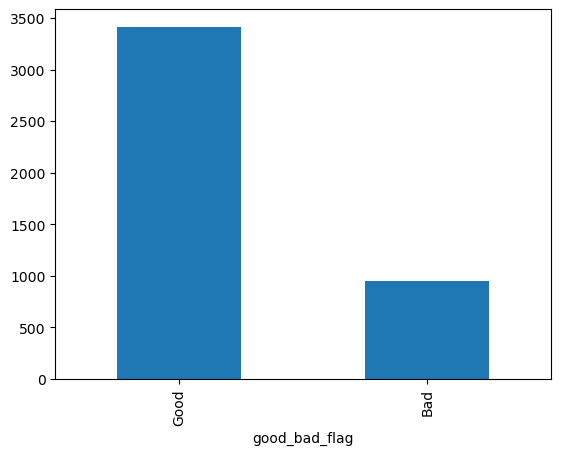

In [107]:
df_final.good_bad_flag.value_counts().plot(kind='bar')

In [108]:
df_final.good_bad_flag.unique()

array(['Good', 'Bad'], dtype=object)

In [109]:
#Convert our text into number
#Note -The category is not a multi-type but just a dual-type(Good/Bad) ,so we can use
df_final.good_bad_flag=(df_final.good_bad_flag == 'Bad').astype('int64')  #This means that let our Good be 1 and everyother thing be 0,because we have 2 category

In [110]:
df_final.good_bad_flag.unique()

array([0, 1], dtype=int64)

In [111]:
df = df_final

In [112]:
df['loan_per_day'] = df['loanamount'] / df['termdays']

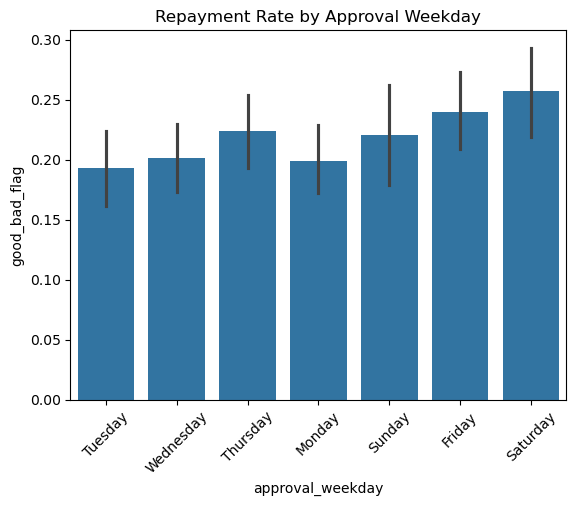

In [113]:
sns.barplot(x='approval_weekday', y='good_bad_flag', data=df)
plt.title('Repayment Rate by Approval Weekday')
plt.xticks(rotation=45)
plt.show()

* Brief Interpretation

Range of values: From 74.3% (Saturday) to 80.6% (Tuesday).

Insight: Loans approved on weekends (Saturday) seem slightly riskier than those on weekdays (Tuesday/Monday/Wednesday).
Yes — for now. Here's why:

It shows moderate variation because it indicates a pattern that warrants further investigation before any major policy changes are made. The variation is moderate, meaning we should investigate cautiously rather than overreact and thus,suggests operational inconsistencies which are worth addressing, potentially improving both risk management and profitability.

In [114]:
cat_cols = df.select_dtypes(include = 'object').columns
num_cols = df.select_dtypes(include = np.number).columns

In [115]:
cat_cols.tolist()

['customerid',
 'approval_weekday',
 'employment_status_clients',
 'level_of_education_clients',
 'zone']

In [116]:
num_cols.tolist()

['loanamount',
 'totaldue',
 'termdays',
 'good_bad_flag',
 'age',
 'number_previous_loans',
 'average_loan_amount',
 'max_loan_amount',
 'average_termdays',
 'sum_totaldue',
 'average_days_repaid_after_due',
 'average_days_to_first_repaid',
 'average_loan_duration_days',
 'on_time_repayment_rate',
 'repayment_delay_ratio',
 'loan_per_day']

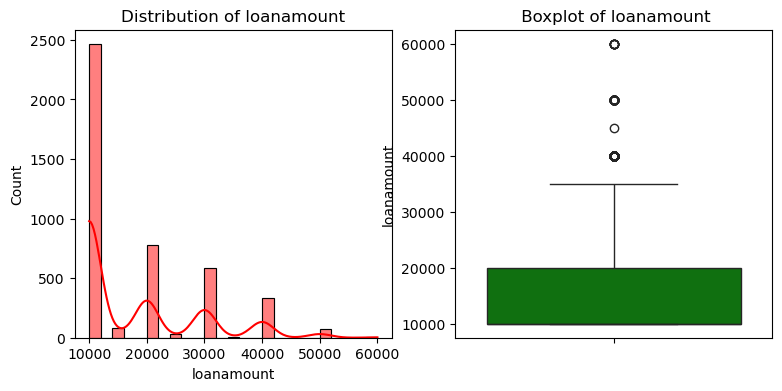

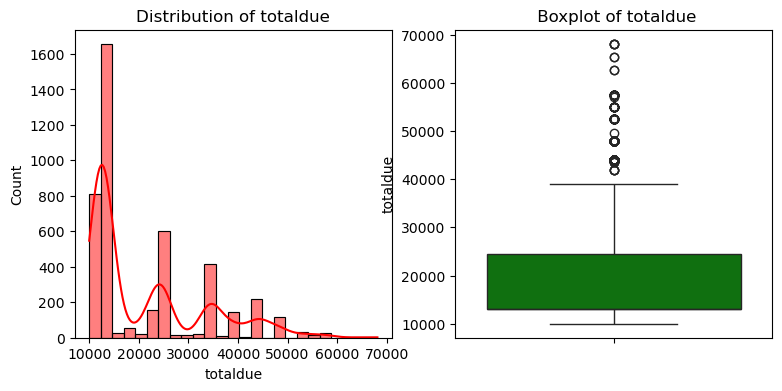

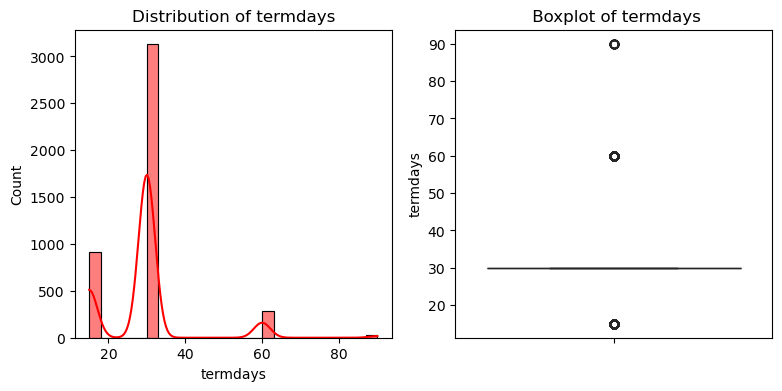

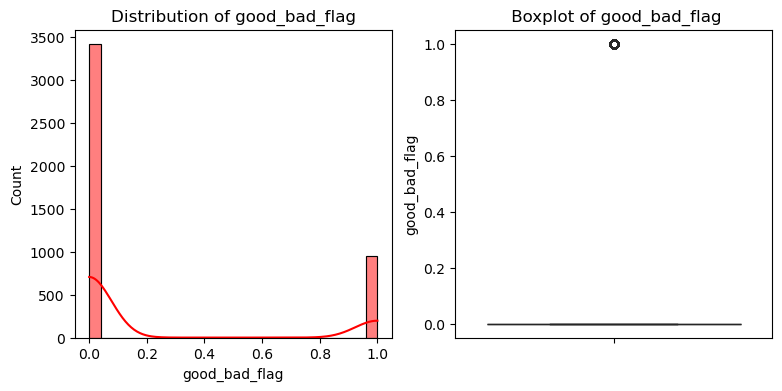

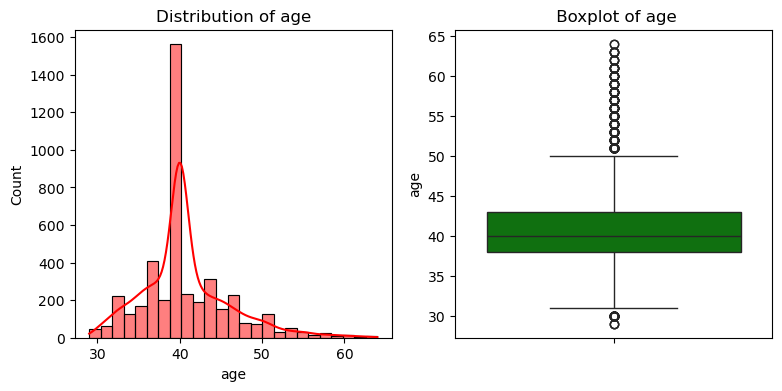

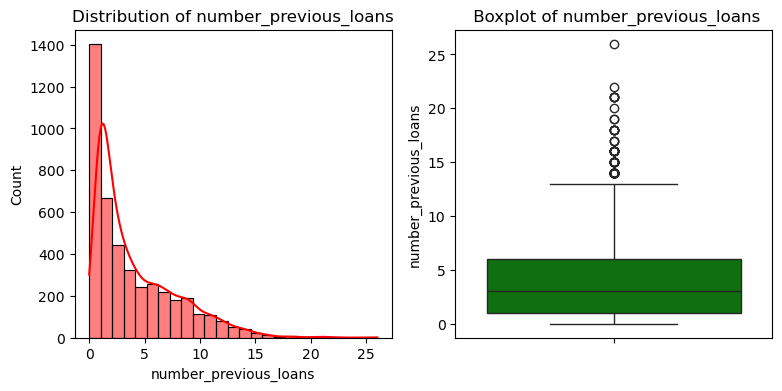

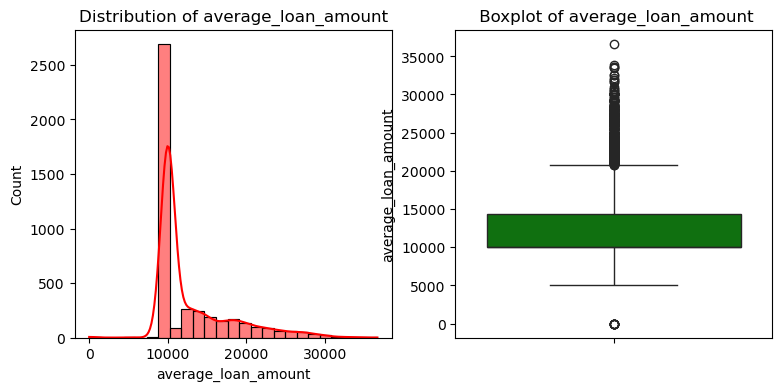

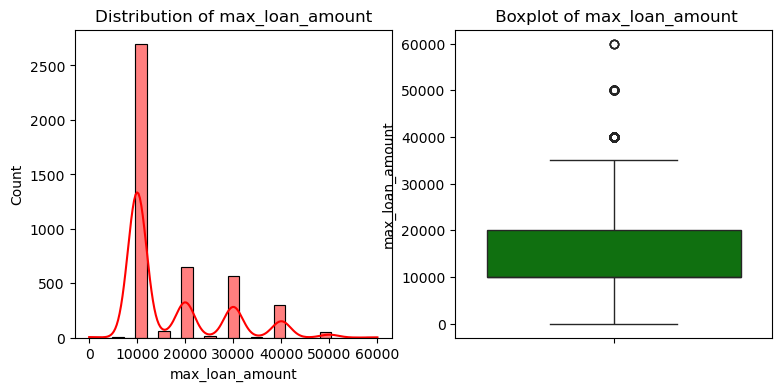

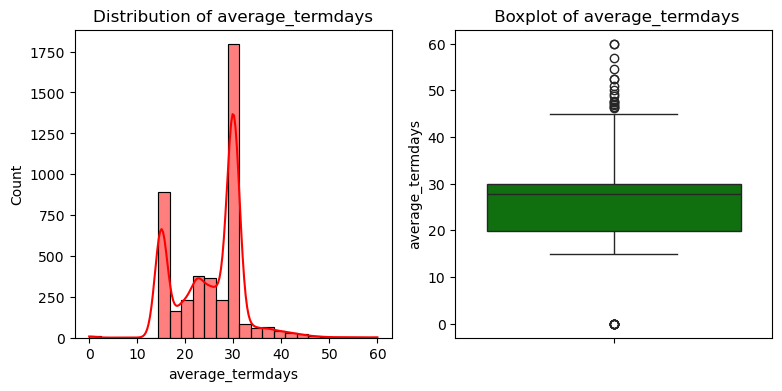

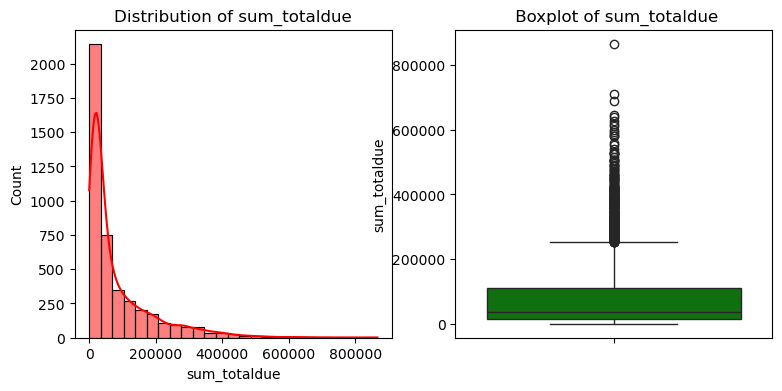

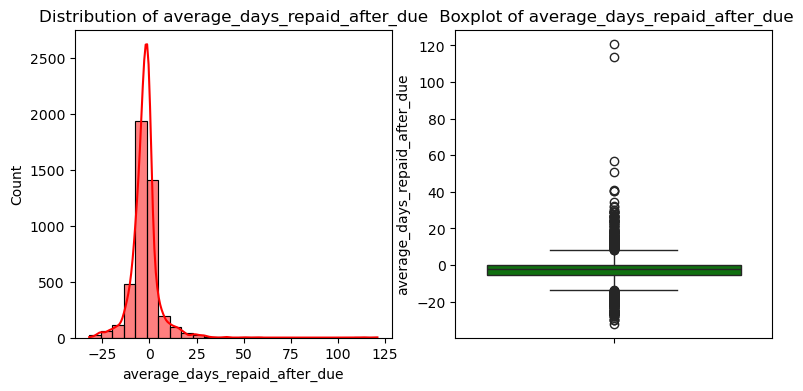

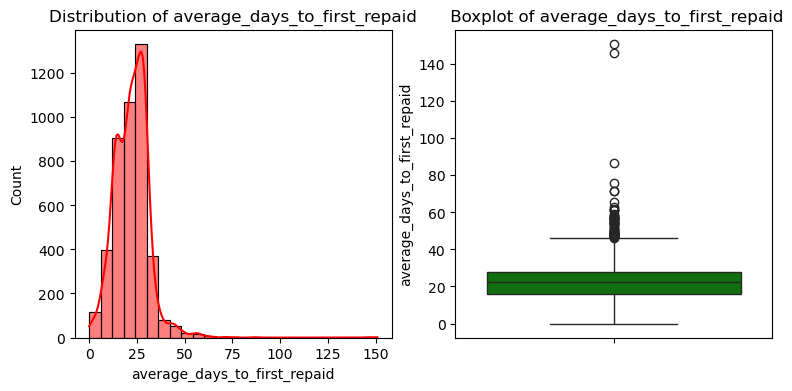

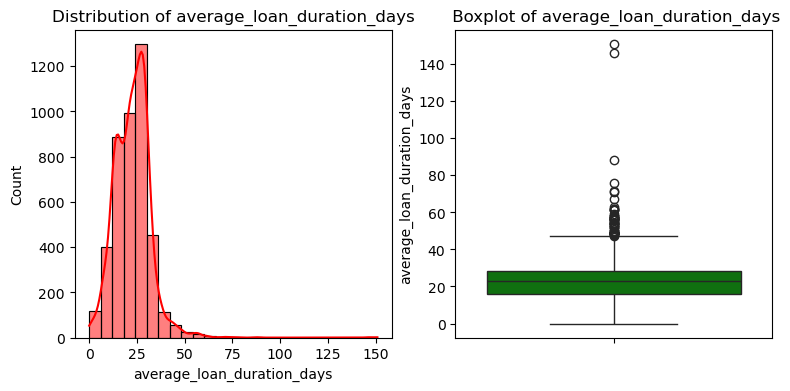

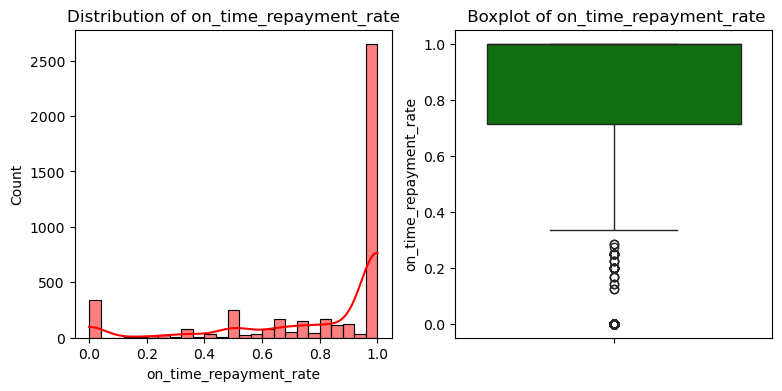

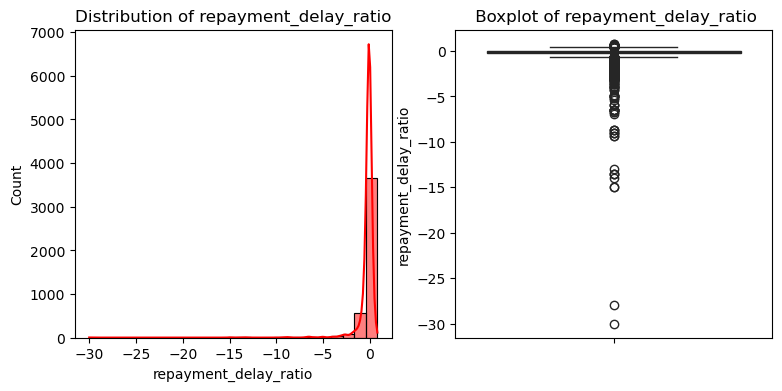

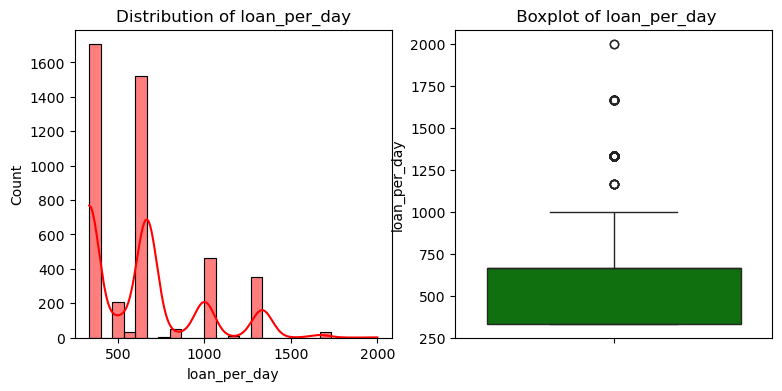

In [117]:
#plot creation for numerical columns
for col in num_cols:
    plt.figure(figsize = (9,4))
    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, color ='red', bins =25)
    plt.title(f'Distribution of {col}')
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[col], color= 'green')
    plt.title(f' Boxplot of {col}')

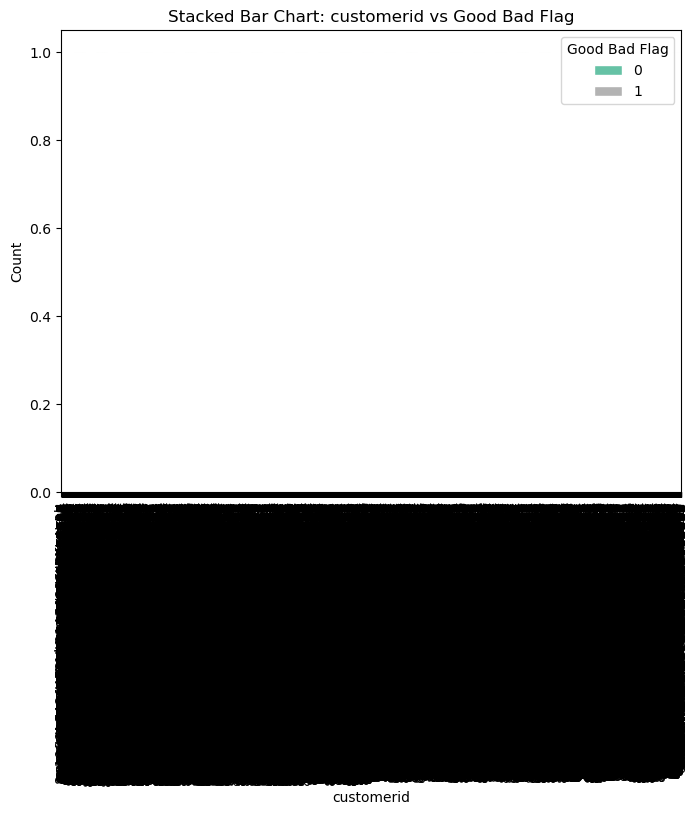

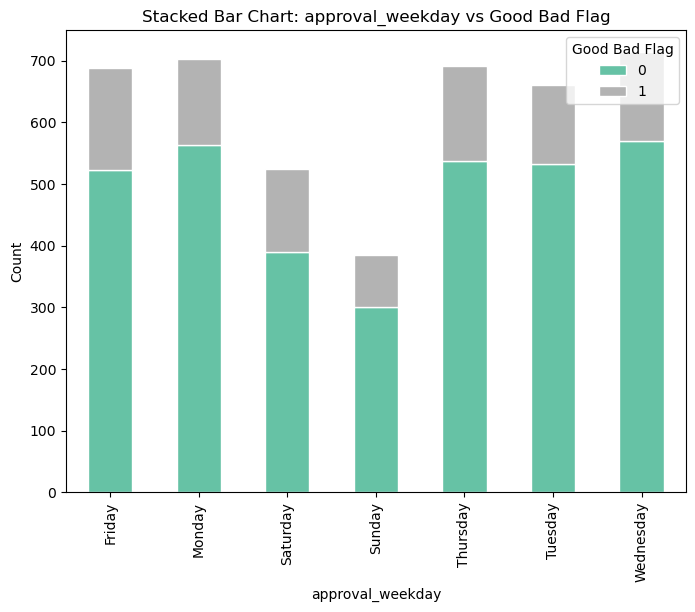

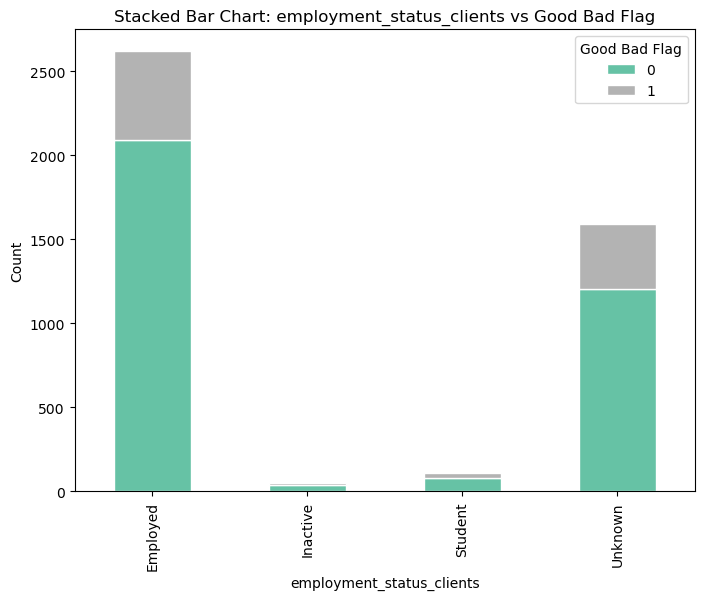

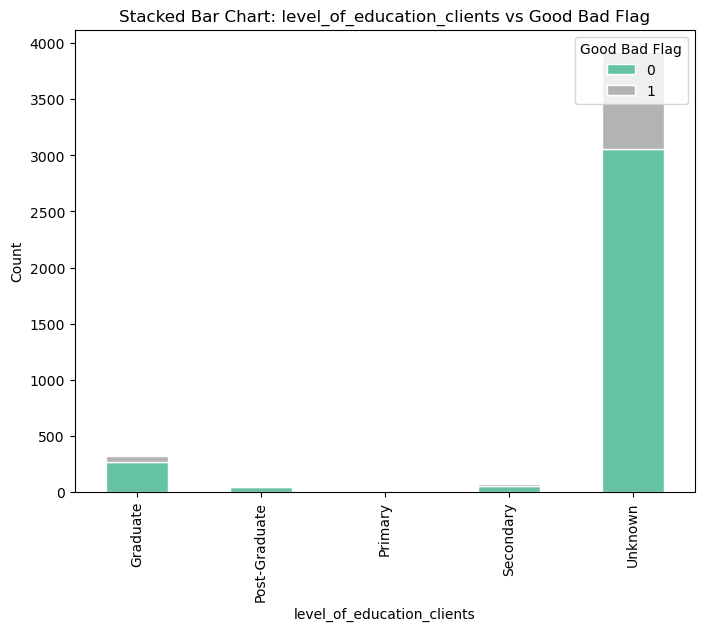

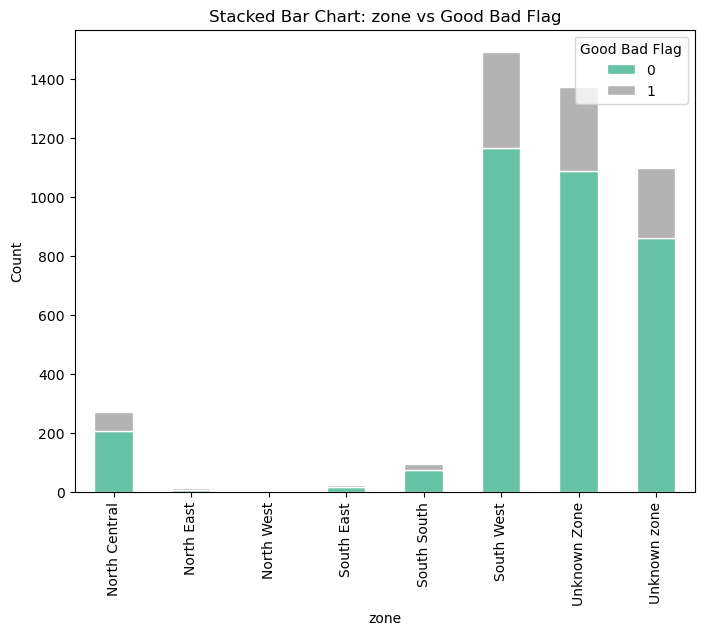

In [118]:
#plot creation for categorical columns(Stacked barchart)

for col in cat_cols:
    ##Create a cross-tab
    crosstab = pd.crosstab(df[col], df['good_bad_flag'])
    ##Plot stacked bar chart
    crosstab.plot(kind="bar", stacked=True, figsize=(8,6), colormap="Set2",edgecolor='white')
    plt.title(f"Stacked Bar Chart: {col} vs Good Bad Flag")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Good Bad Flag", loc="upper right")
    plt.show()

Stacked bar charts are the best way to visualize the relationship between a categorical feature and a binary target variable. They show you the proportion of defaults within each category.
The key is to use pandas.crosstab() to create a contingency table first.

In [119]:
#skewness observation and outliers

In [120]:
#calculation of skewness level
skewness = df[num_cols].skew().sort_values(ascending=False)

In [121]:
skewness

average_days_repaid_after_due     2.534786
sum_totaldue                      2.164769
termdays                          1.932360
average_loan_amount               1.692435
average_days_to_first_repaid      1.681188
average_loan_duration_days        1.539594
good_bad_flag                     1.366824
max_loan_amount                   1.343022
number_previous_loans             1.302964
loanamount                        1.250938
totaldue                          1.165669
loan_per_day                      1.069336
age                               0.919634
average_termdays                 -0.087931
on_time_repayment_rate           -1.674697
repayment_delay_ratio           -12.722346
dtype: float64

The repayment_delay_ratio column has extreme negative skew and has both positive and negative values which makes log transformation unsuitable
The most recommended is the Yeo-Johnson Transformation because is designed for data that contains zeros and negative values.

##### Capping
Capping(also called winsorizattion)is a method to treat outliers once you decide which values are extreme.
It uses a definition of outliers (e.g., values beyond the 1st and 99th percentiles) to determine the boundaries. It then treats (mitigates the effect of) those outliers by replacing them with the boundary values.
Capping  also reduces the skewness of a distribution by compressing its extreme tails, which are often the primary cause of high skewness.

In [122]:
def cap_outliers_percentile(df, column, lower_pct=0.01, upper_pct=0.99):
    lower = df[column].quantile(lower_pct)
    upper = df[column].quantile(upper_pct)
    df[column] = df[column].clip(lower, upper)
    return df

In [123]:
# 3. Define the columns that need capping, in two priority tiers
tier1_cols_to_cap = [
    'repayment_delay_ratio',        # −12.7 (massive negative skew)
    'average_days_repaid_after_due',# 2.53
    'sum_totaldue',                 # 2.16
    'termdays',                     # 1.93
    'average_days_to_first_repaid', # 1.68
    'average_loan_duration_days',    # 1.54
    'average_loan_amount',          # 1.69
]


tier2_cols_to_cap = [
    'max_loan_amount',              # 1.34
    'number_previous_loans',        # 1.30
    'loanamount',                   # 1.25
    'totaldue',                     # 1.16
    'loan_per_day',                 # 1.06
    'on_time_repayment_rate'        # −1.67 (neg skew, needs symmetric capping)
]

In [124]:
# Chain assignments correctly
df_capped = df.copy()
for col in tier1_cols_to_cap:
    df_capped = cap_outliers_percentile(df, col, lower_pct=0.01, upper_pct=0.99)

for col in tier2_cols_to_cap:
    df_capped = cap_outliers_percentile(df, col, lower_pct=0.02, upper_pct=0.98)

In [125]:
#df_capped.head()

In [126]:
df = df_capped

In [127]:
df.head()

,customerid,loanamount,totaldue,termdays,good_bad_flag,approval_weekday,employment_status_clients,level_of_education_clients,age,zone,...,average_loan_amount,max_loan_amount,average_termdays,sum_totaldue,average_days_repaid_after_due,average_days_to_first_repaid,average_loan_duration_days,on_time_repayment_rate,repayment_delay_ratio,loan_per_day
0,8a2a81a74ce8c05d014cfb32a0da1049,30000.0,34500.0,30,0,Tuesday,Employed,Post-Graduate,53,Unknown Zone,...,18181.818182,30000.0,30.0,242900.0,-0.909091,29.363636,29.454545,0.727273,-0.030864,1000.000000
1,8a85886e54beabf90154c0a29ae757c0,15000.0,17250.0,30,0,Wednesday,Employed,Graduate,40,Unknown Zone,...,10000.000000,10000.0,0.0,11500.0,0.000000,3.000000,3.000000,1.000000,0.000000,500.000000
2,8a8588f35438fe12015444567666018e,20000.0,22250.0,15,0,Thursday,Employed,Unknown,41,Unknown Zone,...,10000.000000,10000.0,17.5,70500.0,0.833333,18.166667,18.166667,0.833333,0.045872,1333.333333
3,8a85890754145ace015429211b513e16,10000.0,11500.0,15,0,Thursday,Employed,Unknown,48,Unknown Zone,...,10000.000000,10000.0,22.5,24500.0,7.500000,31.500000,31.500000,0.000000,0.238095,666.666667
4,8a858970548359cc0154883481981866,40000.0,44000.0,30,0,Monday,Employed,Primary,39,South West,...,18750.000000,30000.0,37.5,188400.0,-3.125000,27.000000,27.000000,1.000000,-0.115741,1333.333333


Here is how capping helped in reducing skewness of our numerical columns


In [128]:
#Lets re-calculate the skewness level
skewness = df[num_cols].skew().sort_values(ascending=False)

In [129]:
skewness

sum_totaldue                     1.886242
average_loan_amount              1.688205
good_bad_flag                    1.366824
termdays                         1.337030
max_loan_amount                  1.202958
number_previous_loans            1.102369
loanamount                       1.049347
totaldue                         1.030420
loan_per_day                     0.949697
age                              0.919634
average_days_repaid_after_due    0.361923
average_days_to_first_repaid     0.258082
average_loan_duration_days       0.223770
average_termdays                -0.087931
on_time_repayment_rate          -1.674697
repayment_delay_ratio           -3.819075
dtype: float64

In [130]:
#You can see that capping helped to reduce the skewness level to a large extent

##### Outliers detection using IQR 
Outliers are data points that significantly differ from other observations. 
They can skew statistical analyses and negatively impact some machine learning models.

In [131]:
#Outliers Detection Using Inter-quartile Range
def outliers_detection(series):
    Q1 = series.quantile(0.25) #25%
    Q3 = series.quantile(0.75) #75%

#Inter-quartile range is Q3 minus Q1
    IQR = Q3 - Q1
    lower_bound= Q1 - 1.5*IQR
    upper_bound= Q3 + 1.5*IQR #note-The outliers are the values greater than the upper bound and also less than th lower bound
    return series[(series < lower_bound) | (series > upper_bound)] #give us output of all the values between LB Line and UB Line

In [132]:
for col in num_cols:
    outliers = len(outliers_detection(df[col]))
    print(outliers)

419
422
1239
952
283
96
419
361
27
362
408
58
54
385
484
397


In [133]:
df['employment_status_clients'].unique()

array(['Employed', 'Unknown', 'Inactive', 'Student'], dtype=object)

In [134]:
df['level_of_education_clients'].value_counts()

level_of_education_clients
Unknown          3925
Graduate          321
Secondary          65
Post-Graduate      50
Primary             7
Name: count, dtype: int64

In [135]:
#Treating Unknown category or rank as truly missing by replacing the literal 'Unknown' with np.nan
df['level_of_education_clients'] = df[ 'level_of_education_clients'].replace('Unknown', np.nan)

In [136]:
corr_matrix=df[num_cols].corr()

In [137]:
corr_matrix

,loanamount,totaldue,termdays,good_bad_flag,age,number_previous_loans,average_loan_amount,max_loan_amount,average_termdays,sum_totaldue,average_days_repaid_after_due,average_days_to_first_repaid,average_loan_duration_days,on_time_repayment_rate,repayment_delay_ratio,loan_per_day
loanamount,1.000000,0.994543,0.535171,-0.117770,0.015222,0.831164,0.880023,0.892638,0.274306,0.849992,-0.101319,-0.019177,0.046552,0.168051,0.059179,0.721366
totaldue,0.994543,1.000000,0.609211,-0.110729,0.017463,0.816157,0.865959,0.879876,0.306199,0.834599,-0.102120,0.001270,0.068616,0.166164,0.061025,0.659127
termdays,0.535171,0.609211,1.000000,-0.004075,0.001399,0.397347,0.456408,0.467870,0.513265,0.426967,-0.062529,0.206110,0.270773,0.066975,0.052871,-0.169624
good_bad_flag,-0.117770,-0.110729,-0.004075,1.000000,-0.051313,-0.091259,-0.106746,-0.114549,-0.017744,-0.093726,0.248116,0.186892,0.176069,-0.285149,0.120381,-0.125653
age,0.015222,0.017463,0.001399,-0.051313,1.000000,-0.007394,0.010205,0.008966,0.018554,0.000738,-0.022849,0.010078,0.004029,0.068178,0.018742,0.008685
number_previous_loans,0.831164,0.816157,0.397347,-0.091259,-0.007394,1.000000,0.856880,0.887287,0.233750,0.950903,0.003395,0.050935,0.102059,0.039350,0.120860,0.635191
average_loan_amount,0.880023,0.865959,0.456408,-0.106746,0.010205,0.856880,1.000000,0.956024,0.333459,0.944372,-0.067640,0.027403,0.099462,0.118086,0.067999,0.633608
max_loan_amount,0.892638,0.879876,0.467870,-0.114549,0.008966,0.887287,0.956024,1.000000,0.299359,0.919992,-0.070034,0.010280,0.083600,0.122716,0.071582,0.646252
average_termdays,0.274306,0.306199,0.513265,-0.017744,0.018554,0.233750,0.333459,0.299359,1.000000,0.306912,-0.088030,0.580466,0.627569,0.020532,0.048122,-0.112260
sum_totaldue,0.849992,0.834599,0.426967,-0.093726,0.000738,0.950903,0.944372,0.919992,0.306912,1.000000,-0.036247,0.050143,0.108895,0.070501,0.086220,0.622270


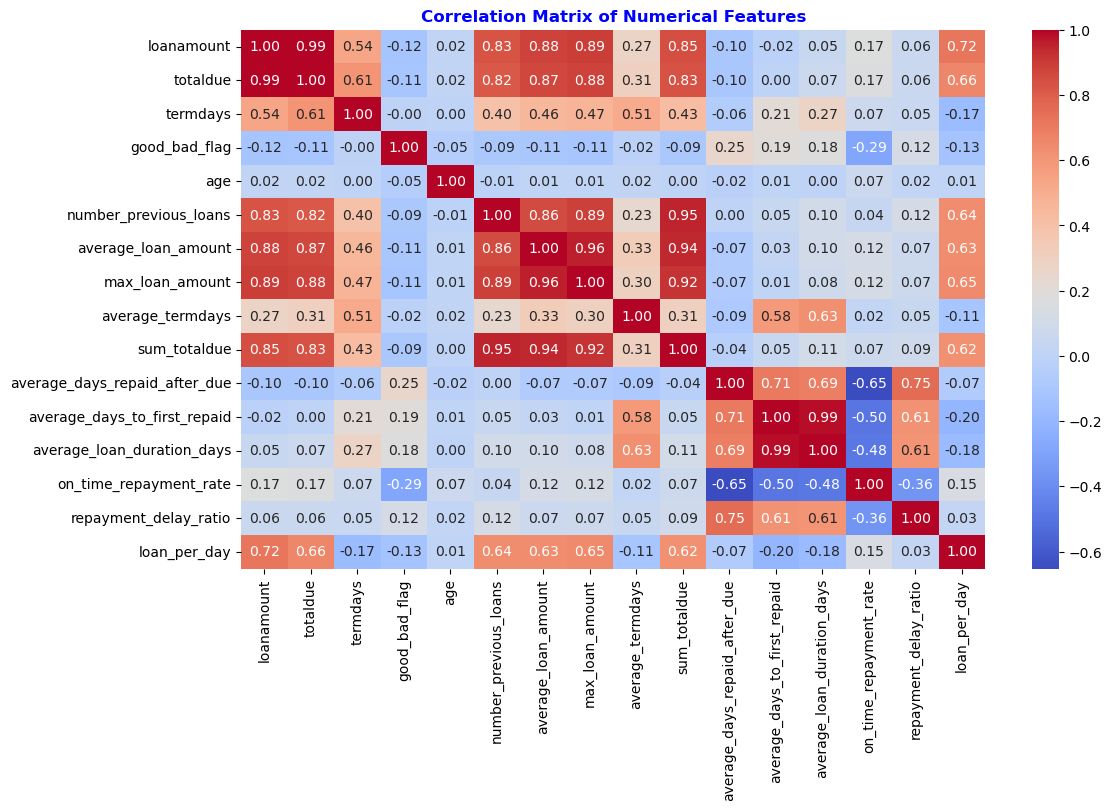

In [138]:
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix,cmap='coolwarm',fmt='.2f',annot=True,linecolor='red')
plt.title('Correlation Matrix of Numerical Features',fontsize=12,fontweight='bold',color='blue')
plt.show()

#### BRIEF INTERPRETATION OF THE CORRELATION MATRIX
* A correlation matrix is a table that displays the correlation coefficients between many variables at once. It is a powerful tool used in data analysis to quickly find and visualize the strength and direction of the linear relationships between pairs of variables.

* loanamount and totaldue (Correlation: 0.99)

These two columns are nearly identical. This is completely expected, as the totaldue is almost certainly the loanamount plus some fees or interest.
This is the most severe case of multicollinearity in your dataset.

* average_loan_amount and max_loan_amount (Correlation: 0.96)

* number_previous_loans and sum_totaldue (Correlation: 0.85)

These features, which were engineered from previous loan data, are all telling a very similar story about a customer's past borrowing habits. A customer who has taken many loans (number_previous_loans) will naturally have a high total amount due from those loans (sum_totaldue).
Similarly, their average loan size (average_loan_amount) is logically tied to their maximum loan size (max_loan_amount).

* average_days_repaid_after_due and repayment_delay_ratio (Correlation: 0.95)

The repayment_delay_ratio was directly calculated using average_days_repaid_after_due, so their high correlation is guaranteed.

* Multicollinearity exists when two or more features are highly correlated with each other. This can be a problem for certain models because it makes     it difficult to determine the individual impact of each feature.
Lets deal with it using Variance Inflation Factor

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def get_non_collinear_features(df_numeric: pd.DataFrame, threshold: float = 5.0):
    
    # Create a copy to avoid modifying the original DataFrame
    data_for_vif = df_numeric.copy()
    
    # Start the iterative process
    iteration = 1
    while True:
        print(f" VIF Iteration: Round {iteration}")
        
        # Add a constant (intercept) for VIF calculation. This is a crucial step.
        X = add_constant(data_for_vif)
        
        # Calculate VIF for each feature
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        # We only care about the VIF of the features, not the constant.
        feature_vifs = vif_data[vif_data['feature'] != 'const']
        
        print("Current VIF Scores:")
        # Print the current VIF scores, sorted from highest to lowest
        print(feature_vifs.sort_values('VIF', ascending=False).reset_index(drop=True))
        
        # Find the feature with the highest VIF
        max_vif_feature_row = feature_vifs.loc[feature_vifs['VIF'].idxmax()]
        
        # If the highest VIF is greater than our threshold, remove it and start the loop again.
        if max_vif_feature_row['VIF'] > threshold:
            feature_to_drop = max_vif_feature_row['feature']
            print(f"\nAction: Dropping '{feature_to_drop}' (VIF = {max_vif_feature_row['VIF']:.2f})\n")
            data_for_vif = data_for_vif.drop(columns=[feature_to_drop])
            iteration += 1
        # Otherwise, no feature has a VIF score above the threshold, so we are done.
        else:
            print(f"\nSuccess! All remaining features have a VIF below the threshold of {threshold}.")
            break
            
    # Return the final DataFrame with non-collinear features
    return data_for_vif

In [141]:
# 1. DEFINE THE COLUMNS FOR ANALYSIS
features_to_check = ['loanamount', 'termdays', 'number_previous_loans', 'average_loan_amount', 'max_loan_amount', 'average_termdays', 'totaldue',
                     'sum_totaldue', 'average_loan_duration_days']

# Create a new DataFrame containing only these columns
numeric_subset_df = df[features_to_check].copy()

# Ensure there are no missing values, as VIF cannot handle them
numeric_subset_df.dropna(inplace=True)

# 2. RUN THE AUTOMATED VIF REDUCTION PROCESS
# This will start the sequential, round-by-round process.
final_features_df = get_non_collinear_features(
    df_numeric=numeric_subset_df, 
    threshold=5.0 # We set the VIF threshold to 5
)

# 3. SEE THE FINAL, RECOMMENDED COLUMNS
final_columns_to_use = list(final_features_df.columns)
print(f"Final set of non-collinear features recommended for training: {final_columns_to_use}")

 VIF Iteration: Round 1
Current VIF Scores:
                      feature         VIF
0                    totaldue  438.220022
1                  loanamount  416.639742
2                sum_totaldue   39.217150
3         average_loan_amount   31.853579
4       number_previous_loans   20.474875
5             max_loan_amount   18.324825
6                    termdays    7.054675
7            average_termdays    2.296077
8  average_loan_duration_days    1.766989

Action: Dropping 'totaldue' (VIF = 438.22)

 VIF Iteration: Round 2
Current VIF Scores:
                      feature        VIF
0                sum_totaldue  39.000489
1         average_loan_amount  31.840125
2       number_previous_loans  20.415843
3             max_loan_amount  18.175115
4                  loanamount   6.325188
5            average_termdays   2.290418
6                    termdays   1.811079
7  average_loan_duration_days   1.766896

Action: Dropping 'sum_totaldue' (VIF = 39.00)

 VIF Iteration: Round 3
Curren

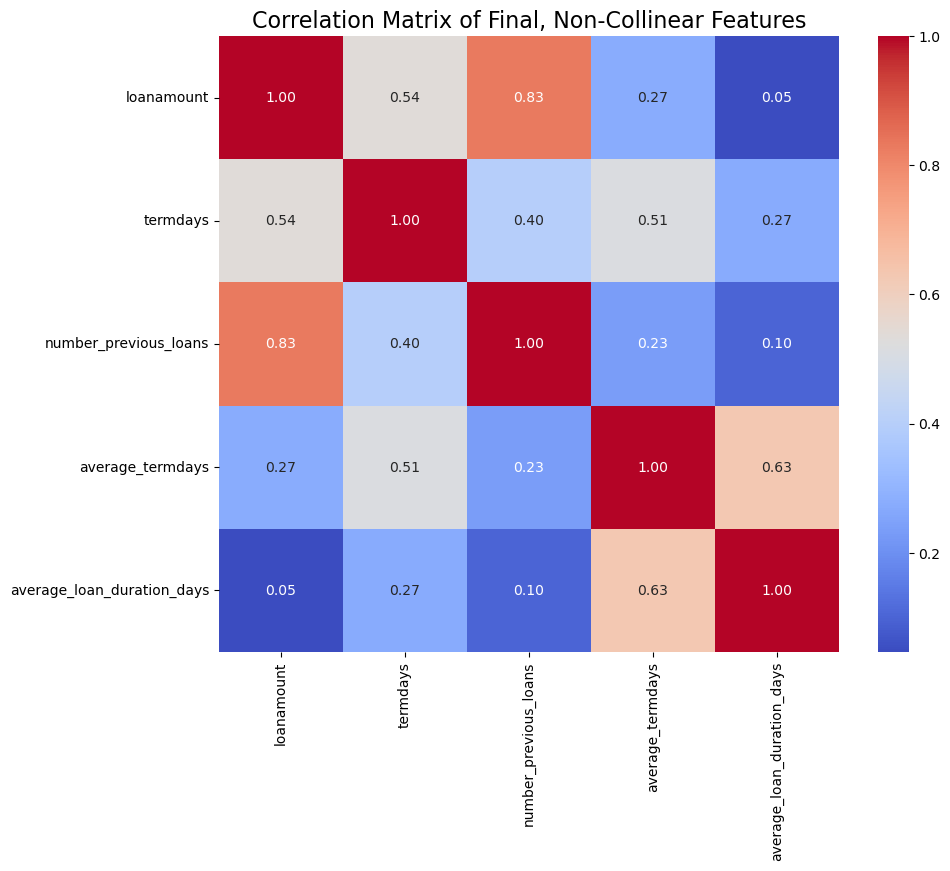

In [142]:
plt.figure(figsize=(10, 8))
sns.heatmap(final_features_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Final, Non-Collinear Features', fontsize=16)
plt.show()

* VIF
In dealing with multicollinearity between some colummns or features,we adopt the method of Variance Inflation Factor(VIF)
VIF is a diagnostic tool that calculates a score for each feature that tells you how much it is correlated with all other features.
It is a manual and iterative process where you calculate the VIF, drop the worst feature, and repeat until all VIF scores are acceptable.
A VIF of 1 means no collinearity; VIF >10 is a red‐flag for severe multicollinearity; 5–10 is moderate.

Interpretation based on VIF > 5 (The Standard Approach)
It is the most widely accepted best practice. It seeks to remove problematic multicollinearity while preserving as much unique information as possible.At this point,We drop features with a VIF above 5.
The stopping point is at round 4 because it shows us that all the columns on that round or all the columns after that iteration have a VIF of less than 5(VIF < 5)
So,those columns are worth keeping 

## Data Preprocessing

In [143]:
df.columns

Index(['customerid', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'approval_weekday', 'employment_status_clients',
       'level_of_education_clients', 'age', 'zone', 'number_previous_loans',
       'average_loan_amount', 'max_loan_amount', 'average_termdays',
       'sum_totaldue', 'average_days_repaid_after_due',
       'average_days_to_first_repaid', 'average_loan_duration_days',
       'on_time_repayment_rate', 'repayment_delay_ratio', 'loan_per_day'],
      dtype='object')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerid                     4368 non-null   object 
 1   loanamount                     4368 non-null   float64
 2   totaldue                       4368 non-null   float64
 3   termdays                       4368 non-null   int64  
 4   good_bad_flag                  4368 non-null   int64  
 5   approval_weekday               4368 non-null   object 
 6   employment_status_clients      4368 non-null   object 
 7   level_of_education_clients     443 non-null    object 
 8   age                            4368 non-null   int64  
 9   zone                           4368 non-null   object 
 10  number_previous_loans          4368 non-null   int64  
 11  average_loan_amount            4368 non-null   float64
 12  max_loan_amount                4368 non-null   f

In [145]:
df.isna().sum()

customerid                          0
loanamount                          0
totaldue                            0
termdays                            0
good_bad_flag                       0
approval_weekday                    0
employment_status_clients           0
level_of_education_clients       3925
age                                 0
zone                                0
number_previous_loans               0
average_loan_amount                 0
max_loan_amount                     0
average_termdays                    0
sum_totaldue                        0
average_days_repaid_after_due       0
average_days_to_first_repaid        0
average_loan_duration_days          0
on_time_repayment_rate              0
repayment_delay_ratio               0
loan_per_day                        0
dtype: int64

* Dealing with Missing Values for the Level_of _education_clients

* The education level acts as a powerful proxy for several underlying factors that directly influence a person's ability and willingness to repay a loan. I will highlight on a few of them shortly

* Financial Stability and Income- A higher education level of a client often strongly correlates with higher income,higher earning capacity and a safer income stability.

*  Financial Literacy and Risk Perception- The Education level of a client can also be a strong indicator of that person's ability to understand and manage their finances.For example,a person with a higher level of education is more likely to fully understand Loan Terms like the consequences of late fees payment, interest accumulation.Individuals with lower formal education levels are more likely to take out loans with terms they cannot meet, not because of an unwillingness to pay, but due to a misunderstanding of the financial product.

*  Behavioral Traits- The education level of a client can also signal some certain behavioral characteristics that are highly desirable in a borrower, in terms of discipline and commitment given to payback loans on time.

So,these factors above tells us the great role this column plays in our prediction,but dues to its large volume of missing values(about 90% missing),the safest appoach is tpo drop it entirely because the model will be unable to learn anything from a column that is almost empty.

In [146]:
x=df.drop(columns=['customerid','good_bad_flag','totaldue', 'sum_totaldue', 'average_days_to_first_repaid', 'approval_weekday',
                   'level_of_education_clients', 'employment_status_clients', 'max_loan_amount','sum_totaldue','repayment_delay_ratio'])
y=df['good_bad_flag']

In [147]:
x.columns

Index(['loanamount', 'termdays', 'age', 'zone', 'number_previous_loans',
       'average_loan_amount', 'average_termdays',
       'average_days_repaid_after_due', 'average_loan_duration_days',
       'on_time_repayment_rate', 'loan_per_day'],
      dtype='object')

In [148]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   loanamount                     4368 non-null   float64
 1   termdays                       4368 non-null   int64  
 2   age                            4368 non-null   int64  
 3   zone                           4368 non-null   object 
 4   number_previous_loans          4368 non-null   int64  
 5   average_loan_amount            4368 non-null   float64
 6   average_termdays               4368 non-null   float64
 7   average_days_repaid_after_due  4368 non-null   float64
 8   average_loan_duration_days     4368 non-null   float64
 9   on_time_repayment_rate         4368 non-null   float64
 10  loan_per_day                   4368 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 375.5+ KB


In [149]:
x.isna().sum()

loanamount                       0
termdays                         0
age                              0
zone                             0
number_previous_loans            0
average_loan_amount              0
average_termdays                 0
average_days_repaid_after_due    0
average_loan_duration_days       0
on_time_repayment_rate           0
loan_per_day                     0
dtype: int64

In [150]:
df.employment_status_clients.unique()

array(['Employed', 'Unknown', 'Inactive', 'Student'], dtype=object)

In [151]:
#Splitting into training and testing part
from sklearn.model_selection import train_test_split

In [152]:
# Identify numerical and categorical columns
num_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = x.select_dtypes(include=['object', 'category']).columns.tolist()

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.8, random_state=42, stratify=y)

In [154]:
from sklearn.preprocessing import PowerTransformer

In [155]:
import joblib

In [156]:
# --- Correct Skewness on the Training Data ---
# We will apply the same transformations to the test data later inside the pipeline.
skewness = x_train[num_cols].skew()
for col in num_cols:
    if skewness[col] > 1.0:
        x_train[col] = np.log1p(x_train[col])
        x_test[col] = np.log1p(x_test[col])
    elif skewness[col] > 0.5:
        x_train[col] = np.sqrt(x_train[col])
        x_test[col] = np.sqrt(x_test[col])
    elif skewness[col] < -0.5:
        pt = PowerTransformer(method='yeo-johnson', standardize=True)
        x_train[[col]] = pt.fit_transform(x_train[[col]])
        #saving the transformer right after it has  just been fitted
        joblib.dump(pt, 'power_transformer.pkl')
        x_test[[col]] = pt.transform(x_test[[col]])

--Many machine learning models, especially linear models like Logistic Regression, perform best when the numerical features follow a normal distribution (a symmetric "bell curve").

--By applying transformations like logarithm (log1p), square root (sqrt), and Yeo-Johnson (PowerTransformer), This helps to:
 1. Reduce the Impact of Outliers: Prevents extreme values from dominating the model's learning process.

 2. Stabilize the Model: Helps the model learn more robust and stable patterns.

In [157]:
skewness = x_train[num_cols].skew().sort_values(ascending=False)

In [158]:
skewness

average_loan_amount              1.308451
loanamount                       0.656199
age                              0.639964
loan_per_day                     0.599859
average_days_repaid_after_due    0.377326
number_previous_loans            0.350428
average_loan_duration_days       0.260418
average_termdays                -0.076242
termdays                        -0.122498
on_time_repayment_rate          -0.835889
dtype: float64

In [159]:
#From the results above,you can the aftermath effect of using the various required approaches to deal with skewness.

In [160]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#### Transformer Creation- Passing it through a pipeline

In [161]:
#DEFINE PREPROCESSING PIPELINES

# Numerical preprocessing pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing pipeline
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [162]:
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [163]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])

In [164]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['loanamount', 'termdays', 'age',
                                  'number_previous_loans',
                                  'average_loan_amount', 'average_termdays',
                                  'average_days_repaid_after_due',
                                  'average_loan_duration_days',
                                  'on_time_repayment_rate', 'loan_per_day']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['zone'])])

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [166]:
#Defining the models
models = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=2000,class_weight='balanced'),
    'RandomForest': RandomForestClassifier(random_state=42,class_weight='balanced'),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42,class_weight='balanced')
}

#### Hyperparameter tuning process for all the Models

In [167]:
param_grids = {
    # Grid for Logistic Regression (will use SMOTE)
    'LogisticRegression': {
        'resample__k_neighbors': [5, 7],
        'model__C': [0.1, 1.0, 10.0],
        'model__penalty': ['l1', 'l2']
    },
    
    # Grid for Random Forest (will use ADASYN)
    'RandomForest': {
        'resample__n_neighbors': [5, 7],
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20],
        'model__min_samples_leaf': [1, 2]
    },
    
    # Grid for XGBoost (will use SMOTE)
    'XGBoost': {
        'resample__k_neighbors': [5, 7],
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5],
        'model__learning_rate': [0.1, 0.2]
    },
    
    # Grid for LightGBM (will use SMOTE)
    'LightGBM': {
        'resample__k_neighbors': [5, 7],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.1, 0.2],
        'model__num_leaves': [31, 40] # Key parameter for LightGBM
    }
}

#### Stratified K-Fold CV + GridSearchCV

* For a dataset of this size having about 4350+ rows in total, a splitting into 80% for training and 20% for testing is not the best approach.
The much more robust method and approach is the Stratified K-Fold Cross-Validation.

--What it does is that it splits the data into 'K' chunks (e.g., 5 or 10),and then trains the model K times. Each time, it uses one chunk for testing and the other K-1 chunks for training.

--Why it is better is because it uses all of your data for both training and validation at some point,and is crucial for this type of problem because it ensures that in every fold, the percentage of 'good loans' and 'bad loans' is the same as in the original dataset thus preventing any fold from being biased.

In [168]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV

In [169]:
#Setup Stratified K-Fold Cross-Validation
# This ensures each fold of the cross-validation has the same class distribution as the whole dataset.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Build and Tune Pipelines in a Loop
best_models = {}
all_results = {}
for name, model in models.items():

    # Choose appropriate resampler based on model
    resampler = ADASYN(random_state=42) if name == 'RandomForest' else SMOTE(random_state=42)

    # Create the full pipeline
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resample', resampler),
        ('model', model)
    ])

    # Setup GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grids[name],
        cv=skf,
        scoring='roc_auc',
        n_jobs=-1
    )

    # Fit the model
    grid_search.fit(x_train, y_train)

    
    all_results[name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }
    best_models[name] = grid_search.best_estimator_
    print(f" - Best Cross-Validation ROC AUC: {grid_search.best_score_:.4f}")
    print(f" - Best Hyperparameters: {grid_search.best_params_}")

 - Best Cross-Validation ROC AUC: 0.6845
 - Best Hyperparameters: {'model__C': 0.1, 'model__penalty': 'l2', 'resample__k_neighbors': 5}
 - Best Cross-Validation ROC AUC: 0.6702
 - Best Hyperparameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 100, 'resample__n_neighbors': 7}
 - Best Cross-Validation ROC AUC: 0.6835
 - Best Hyperparameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'resample__k_neighbors': 7}
[LightGBM] [Info] Number of positive: 2732, number of negative: 2732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2256
[LightGBM] [Info] Number of data points in the train set: 5464, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
 - Best Cros

* Final Comparison Table:

This table neatly summarizes the performance of all four tuned models, sorted from best to worst. 
This makes it very easy to see which model architecture and hyperparameter settings worked best for your specific dataset.

#### Final Evaluation on the Hold-Out Test Set

Now we evaluate our final, tuned model on the x_test and y_test data that it has never seen before. 
This gives us the most honest assessment of its performance.

In [170]:
#Importing metrics for evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay)

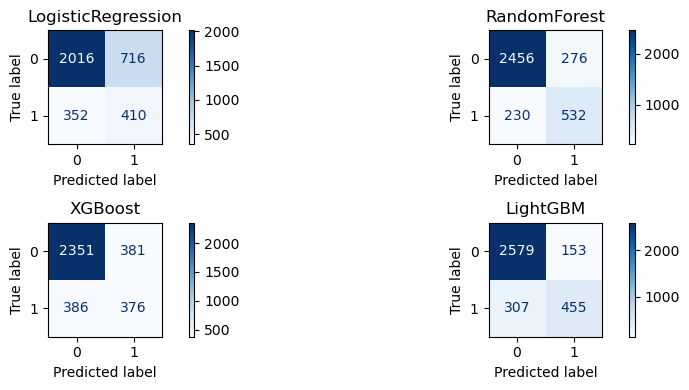

In [171]:
final_results = {}

fig, axes = plt.subplots(2,2, figsize=(10,4))

for (name, model), ax in zip(best_models.items(), axes.flatten()): 
    # Making predictions on the test set   
    y_pred = model.predict(x_test)
    # Get prediction probabilities for the positive class (needed for ROC AUC)
    y_proba = model.predict_proba(x_test)[:, 1]
    
    # Making predictions on the train set for comparison
    train_pred = model.predict(x_train)
    train_proba = model.predict_proba(x_train)[:, 1]

    # Evaluate the predictions
    accuracy_level_train = accuracy_score(y_train, train_pred)
    accuracy_level_test = accuracy_score(y_test, y_pred)
    precision_level_train = precision_score(y_train, train_pred, average='weighted')
    precision_level_test = precision_score(y_test, y_pred, average='weighted')
    recall_level_train = recall_score(y_train, train_pred, average='weighted')
    recall_level_test = recall_score(y_test, y_pred, average='weighted')
    f1_level_train = f1_score(y_train, train_pred, average='weighted')
    f1_level_test = f1_score(y_test, y_pred, average='weighted')
    roc_auc_train = roc_auc_score(y_train, train_proba)
    roc_auc_test = roc_auc_score(y_test, y_proba)
    conf_mat_train = confusion_matrix(y_train, train_pred)
    conf_mat_test = confusion_matrix(y_test, y_pred)

    final_results[name] = {
        'Accuracy Train': accuracy_level_train,
        'Accuracy Test': accuracy_level_test,
        'Precision Train': precision_level_train,
        'Precision Test': precision_level_test,
        'Recall Train': recall_level_train,
        'Recall Test': recall_level_test,
        'F1 Train': f1_level_train,
        'F1 Test': f1_level_test,
        'ROC AUC Train': roc_auc_train,
        'ROC AUC Test': roc_auc_test,
        'Confusion Train': conf_mat_train,
        'Confusion Test': conf_mat_test
    }

    #Plot the Confusion Matrix
    cm = confusion_matrix(y_train,train_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=conf_mat_train)
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)
    
plt.tight_layout()
plt.show()

* BRIEF INTERPRETATION OF THE CONFUSION MATRIX

--The Logistic Regression model slightly favors the negative class,reflected in more false positives compared to random forest.

--The Random Forest model produces the highest number of true negatives suggesting a conservative apporach to classifying the positive class.

--The XGBoost model shows a balanced misclassification pattern.Relatively moderate errors in both false positives.

--The LightGBM Model has the fewest false positives indicating strong precision for the positive class.

*In Summary, the overall key takeaways are:

1. The Logistic Regression yields balanced errors but more false positives, making it preferable when catching every defaulter (higher recall) outweighs the cost of extra false alerts.

2. The Ensemble methods (RF, XGBoost, LightGBM) excel at safely identifying non-defaulters (higher specificity) but sacrifice some sensitivity.

In [172]:
final_results

{'LogisticRegression': {'Accuracy Train': 0.6943331425300515,
  'Accuracy Test': 0.7105263157894737,
  'Precision Train': 0.7450921372111821,
  'Precision Test': 0.7544197830038002,
  'Recall Train': 0.6943331425300515,
  'Recall Test': 0.7105263157894737,
  'F1 Train': 0.7128907981265133,
  'F1 Test': 0.7268479893208744,
  'ROC AUC Train': 0.6965825945439104,
  'ROC AUC Test': 0.7103147122191444,
  'Confusion Train': array([[2016,  716],
         [ 352,  410]], dtype=int64),
  'Confusion Test': array([[517, 167],
         [ 86, 104]], dtype=int64)},
 'RandomForest': {'Accuracy Train': 0.8551803091013166,
  'Accuracy Test': 0.7391304347826086,
  'Precision Train': 0.8585500654325857,
  'Precision Test': 0.7480622344752778,
  'Recall Train': 0.8551803091013166,
  'Recall Test': 0.7391304347826086,
  'F1 Train': 0.8566870960938723,
  'F1 Test': 0.7432903648678174,
  'ROC AUC Train': 0.9099548752416198,
  'ROC AUC Test': 0.6969413665743306,
  'Confusion Train': array([[2456,  276],
      

In [173]:
#CREATE COMPARISON TABLE
model_results = pd.DataFrame(final_results).T  # Transpose to get models as index, metrics as columns
model_results = model_results.sort_values(by='ROC AUC Train', ascending=False)

In [174]:
model_results

,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test,ROC AUC Train,ROC AUC Test,Confusion Train,Confusion Test
LightGBM,0.868346,0.767735,0.861943,0.740838,0.868346,0.767735,0.862751,0.749767,0.919445,0.673115,"[[2579, 153], [307, 455]]","[[614, 70], [133, 57]]"
RandomForest,0.85518,0.73913,0.85855,0.748062,0.85518,0.73913,0.856687,0.74329,0.909955,0.696941,"[[2456, 276], [230, 532]]","[[561, 123], [105, 85]]"
XGBoost,0.780481,0.750572,0.779962,0.758202,0.780481,0.750572,0.78022,0.754135,0.765085,0.690116,"[[2351, 381], [386, 376]]","[[567, 117], [101, 89]]"
LogisticRegression,0.694333,0.710526,0.745092,0.75442,0.694333,0.710526,0.712891,0.726848,0.696583,0.710315,"[[2016, 716], [352, 410]]","[[517, 167], [86, 104]]"


<Figure size 1200x600 with 0 Axes>

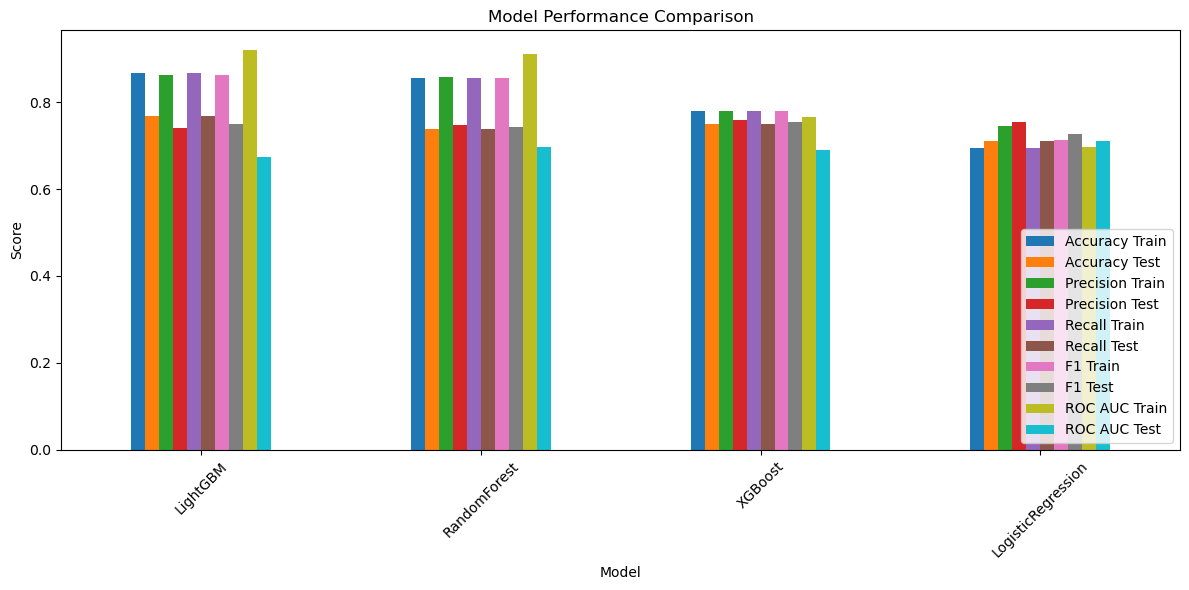

In [175]:
# Plot the comparison
plt.figure(figsize=(12, 6))
model_results.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [176]:
#Final comparison table
print("\nFINAL MODEL COMPARISON")
print(model_results.round(4))
print("\nBest model based on ROC AUC:", model_results.index[0])


FINAL MODEL COMPARISON
                   Accuracy Train Accuracy Test Precision Train  \
LightGBM                 0.868346      0.767735        0.861943   
RandomForest              0.85518       0.73913         0.85855   
XGBoost                  0.780481      0.750572        0.779962   
LogisticRegression       0.694333      0.710526        0.745092   

                   Precision Test Recall Train Recall Test  F1 Train  \
LightGBM                 0.740838     0.868346    0.767735  0.862751   
RandomForest             0.748062      0.85518     0.73913  0.856687   
XGBoost                  0.758202     0.780481    0.750572   0.78022   
LogisticRegression        0.75442     0.694333    0.710526  0.712891   

                     F1 Test ROC AUC Train ROC AUC Test  \
LightGBM            0.749767      0.919445     0.673115   
RandomForest         0.74329      0.909955     0.696941   
XGBoost             0.754135      0.765085     0.690116   
LogisticRegression  0.726848      0.696583 

#### SHAP and Feature Importance

* SHAP (SHapley Additive exPlanations): It is a method that calculates the exact contribution of each feature to each individual prediction by comparing all possible combinations of features.

* Feature Importance:It is a  measurement of how much each input variable influences the model's predictions across the entire dataset.

In [177]:
#This is like a fishing out back to origin or source-observe it entered into cat and thus entered into encoder and thus dived deeper into cat_cols using distinct func

In [178]:
import shap

# Get the feature importance for the best model
best_model_name = model_results.index[0]
best_model = best_models[best_model_name]

# Create a SHAP explainer based on model type
if best_model_name in ['RandomForest', 'XGBoost', 'LightGBM']:
    # Prepare data for SHAP analysis (use preprocessed test data)
    x_test_processed = best_model.named_steps['preprocessor'].transform(x_test)
    
    # Skip the resampling step for explanation (only needed for training)
    model = best_model.named_steps['model']

In [179]:
#CREATE SHAP EXPLAINER
# For tree models (works for RandomForest, XGBoost, LightGBM)
if best_model_name in ['RandomForest', 'XGBoost', 'LightGBM']:
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values
    shap_values = explainer.shap_values(x_test_processed)
    
    # For binary classification, use positive class
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # Index 1 = positive class
    
    #GET FEATURE NAMES
    # Get feature names after preprocessing (includes one-hot encoding)
    feature_names = (num_cols + 
                     list(best_model.named_steps['preprocessor']
                         .named_transformers_['cat']
                         .named_steps['encoder']
                         .get_feature_names_out(cat_cols)))

In [180]:
feature_names

['loanamount',
 'termdays',
 'age',
 'number_previous_loans',
 'average_loan_amount',
 'average_termdays',
 'average_days_repaid_after_due',
 'average_loan_duration_days',
 'on_time_repayment_rate',
 'loan_per_day',
 'zone_North Central',
 'zone_North East',
 'zone_North West',
 'zone_South East',
 'zone_South South',
 'zone_South West',
 'zone_Unknown Zone',
 'zone_Unknown zone']

In [181]:
importance = best_model.named_steps['model'].feature_importances_

In [182]:
importance

array([ 66,  38, 521, 469, 221, 240, 462, 408, 213,  96,  20,  11,   0,
        18,  34,  81,  65,  37])

In [183]:
sort=np.argsort(importance)[::-1]

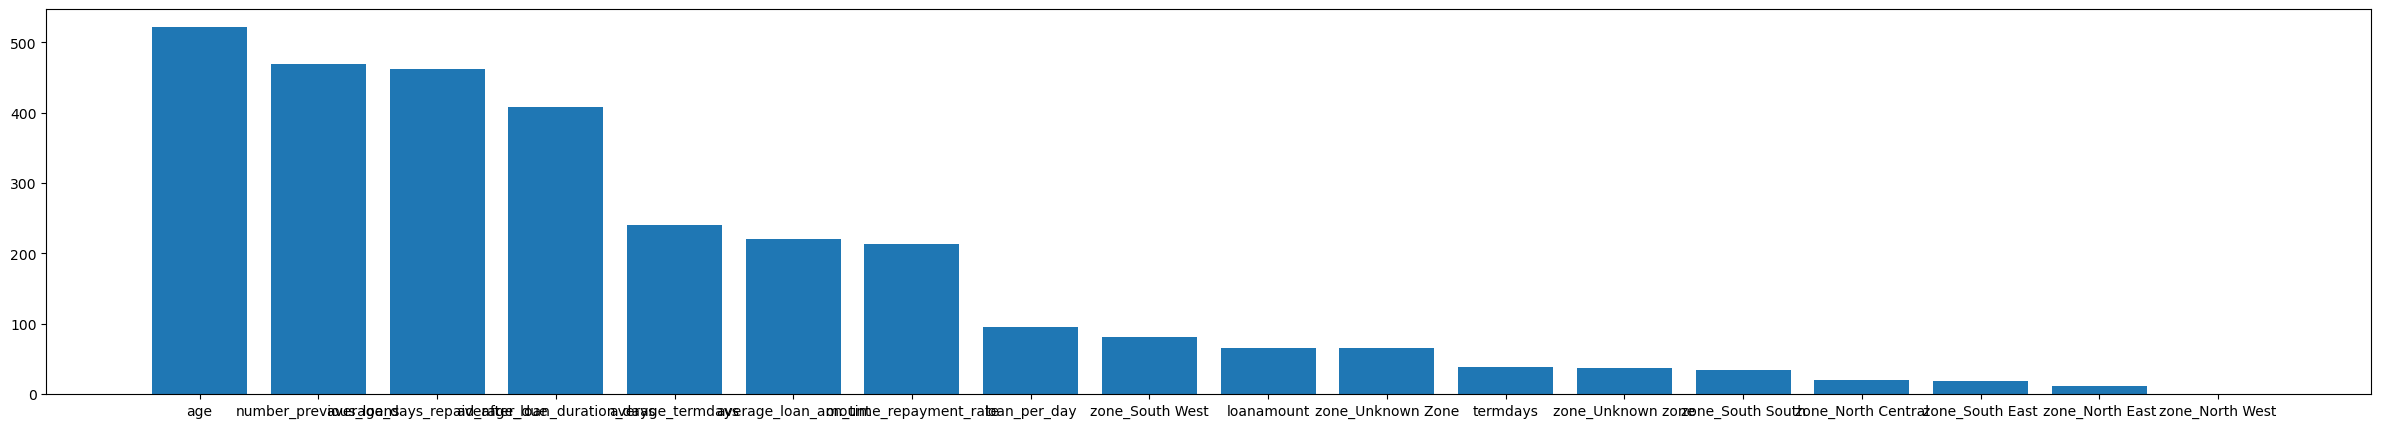

In [184]:
plt.figure(figsize=(30,5))

plt.bar(range(len(importance)), importance[sort])
plt.xticks(range(len(importance)),np.array(feature_names)[sort])
plt.show()

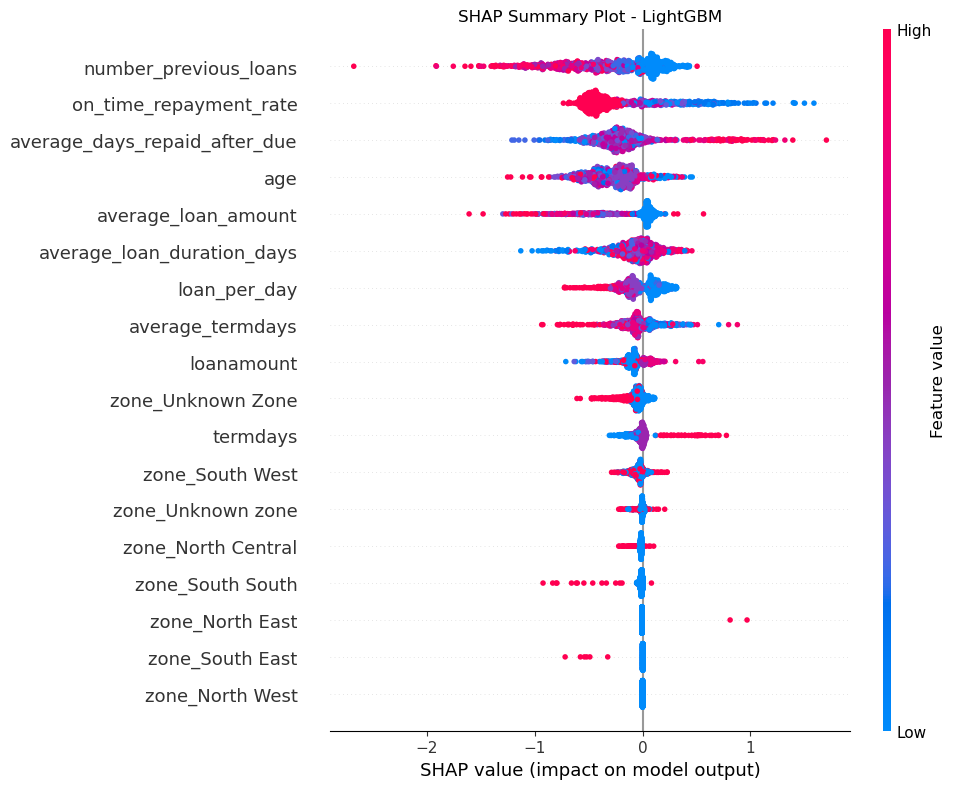

In [185]:
#SHAP Summary Plot (global importance)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, x_test_processed, feature_names=feature_names, show=False, plot_size=(10, 8))
plt.title(f'SHAP Summary Plot - {best_model_name}')
plt.tight_layout()
plt.show()

* SHAP Results Overview

-number_previous_loans → Higher past loans generally increase risk (likely due to over-borrowing).

-on_time_repayment_rate → High values strongly reduce risk, while low values raise risk.

-average_days_repaid_after_due → Longer repayment delays increase risk; opposite of on-time rate.

-age → Younger borrowers tend to be riskier; older borrowers slightly safer.

-loan_per_day → More frequent borrowing raises risk.

-average_loan_duration_days / average_termdays → Longer terms increase risk; shorter terms safer.

-loanamount → Larger loans show a mild tendency toward higher risk, but effect is mixed.

-zone_Unknown / region dummies → Missing or unknown location data increases risk; some regions (e.g., South West) appear safer.

-termdays → Low importance compared to its averaged variants.

In [186]:
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       684
           1       0.45      0.30      0.36       190

    accuracy                           0.77       874
   macro avg       0.64      0.60      0.61       874
weighted avg       0.74      0.77      0.75       874

[[614  70]
 [133  57]]


### Testing and Saving the Model

In [187]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loanamount', 'termdays',
                                                   'age',
                                                   'number_previous_loans',
                                                   'average_loan_amount',
                                                   'average_termdays',
                                                   'average_days_repaid_after_due',
                                                   'average_loan_duration_days',
                                                   'on_time_repayment_rate',
                                                   'loan_per_day']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['zone'])])),
                ('resample', SMOTE(random_state=42)),
                ('model',
                 LGBMClassifier(class_weight='balanced', random_state=42))])

In [188]:
# 'grid_search' is the already-fitted GridSearchCV object
# .best_estimator_ is the complete, trained pipeline (preprocessor + model)

print("Saving the best pipeline")
joblib.dump(grid_search.best_estimator_, "loan_predictor.pkl")

Saving the best pipeline


['loan_predictor.pkl']

In [189]:
#One line for each file
model = joblib.load("loan_predictor.pkl")
power_transformer = joblib.load("power_transformer.pkl")

In [190]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loanamount', 'termdays',
                                                   'age',
                                                   'number_previous_loans',
                                                   'average_loan_amount',
                                                   'average_termdays',
                                                   'average_days_repaid_after_due',
                                                   'average_loan_duration_days',
                                                   'on_time_repayment_rate',
                                                   'loan_per_day']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['zone'])])),
                ('resample', SMOTE(random_state=42)),
                ('model',
                 LGBMClassifier(class_weight='balanced', random_state=42))])

In [191]:
power_transformer

PowerTransformer()

In [197]:
import imblearn
print(imblearn.__version__)

0.12.3
